In [730]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cargar datos

In [731]:
ruta_principal = "/content/drive/MyDrive/IronHack/Proyecto/" # Albert
#ruta_principal = "/content/drive/MyDrive/Proyecto 2/" # Nilgley

In [732]:
coche = pd.read_csv(ruta_principal + 'Despeses - Combov2.csv')
gastos = pd.read_csv(ruta_principal + '2021-09-01-2024-10-31.csv')

# Minería de Datos

In [733]:
coche.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Mitjana Total:,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,3.558 €,2549,"1,396",2549.1,2518,"3,48",Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,NaN,NaN,NaN,NaN,NaN,NaN,Mitjana 2023:,NaN,NaN,NaN,...,2.011 €,1372,"1,466",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,Mitjana 2024:,NaN,NaN,NaN,...,1.547 €,1177,"1,315",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [734]:
# Asignar los valores de la tercera fila (índice 2) como nombres de columna
coche.columns = coche.iloc[2]

# Eliminar las tres primeras filas y la que se usó para los nombres de columna
coche = coche.drop(index=[0, 1, 2])

# Reiniciar el índice para que comience desde 0 después de eliminar filas
coche = coche.reset_index(drop=True)

In [735]:
coche.head(2)

2,Inici,Parades,Final,Motiu,Categories,Modalitat trajecte,Trajecte,Dia,Mes,Any,...,€ Omplerts,Litres Omplerts,€/L,L omperts,L consumits,Desviació,NaN,Km,Km diferència,km fets
0,Roses,NaN,Figueres,Mecànic,Cotxe,NaN,Roses - Figueres,5,12,2022,...,NaN,NaN,NaN,NaN,"-31,7",1,NaN,191622,15,NaN
1,Figueres,St.Silvestre de Valleta,Figueres,Mecànic,Cotxe,NaN,Figueres - St.Silvestre de Valleta - Figueres,5,12,2022,...,NaN,NaN,NaN,"0,00","-19,5",NaN,NaN,191795,173,NaN


In [736]:
coche = coche.drop(columns=['Desviació', 'Km', 'Km diferència', 'km fets', 'Km since born', 'Km since buy', 'Km since month'])

In [737]:
coche.columns

Index([             'Inici',            'Parades',              'Final',
                    'Motiu',         'Categories', 'Modalitat trajecte',
                 'Trajecte',                'Dia',                'Mes',
                      'Any',      'Km diferencia',           'L/100 km',
                 '€/100 km',         '€/trajecte',         'L/trajecte',
               'Condicions',           'Persones',                  nan,
               '€ Omplerts',    'Litres Omplerts',                '€/L',
                'L omperts',        'L consumits',                  nan],
      dtype='object', name=2)

In [738]:
## Separar la información del trayecto entre Inicio, Final y Paradas.
# Eliminar espacios alrededor de los guiones y dividir en elementos
coche['ruta_split'] = coche['Trajecte'].str.replace(r'\s*-\s*', '-', regex=True).str.split('-')

# Asignar "inicio", "final" y "paradas"
coche['Inici'] = coche['ruta_split'].str[0]         # Primer elemento
coche['Final'] = coche['ruta_split'].str[-1]         # Último elemento
coche['Parades'] = coche['ruta_split'].apply(lambda x: x[1:-1] if isinstance(x, list) and len(x) > 2 else [])  # Elementos intermedios
# Si la x es una lista de longitud mayor a 2, se accede a ella. Sino es una lista, añade una lista vacía. Esto es para evitar errores de x[1:-1] con NaN

# "Paradas" como una cadena de carácteres
coche['Parades'] = coche['Parades'].apply(lambda x: ', '.join(x))

# Eliminar la columna temporal
coche = coche.drop(columns=['ruta_split'])

# Mostrar el DataFrame resultante
coche.head()

2,Inici,Parades,Final,Motiu,Categories,Modalitat trajecte,Trajecte,Dia,Mes,Any,...,L/trajecte,Condicions,Persones,NaN,€ Omplerts,Litres Omplerts,€/L,L omperts,L consumits,NaN
0,Roses,,Figueres,Mecànic,Cotxe,NaN,Roses - Figueres,5,12,2022,...,"2,1",Camp. Safari,1,NaN,NaN,NaN,NaN,NaN,"-31,7",NaN
1,Figueres,St.Silvestre de Valleta,Figueres,Mecànic,Cotxe,NaN,Figueres - St.Silvestre de Valleta - Figueres,5,12,2022,...,"12,2",Camp. Safari,2,NaN,NaN,NaN,NaN,"0,00","-19,5",NaN
2,Teià,,Parets del Vallès,Feina,Torre de Malla,NaN,Teià - Parets del Vallès,7,12,2022,...,"1,5",Camp. Safari,1,NaN,NaN,NaN,NaN,"0,00","-18,0",NaN
3,Parets,"Vallcarca, Parets, Vallcarca, Maquinista",Teià,"Feina, Oci","Torre de Malla, Compra",NaN,Parets - Vallcarca-Parets-Vallcarca-Maquinista...,7,12,2022,...,"6,8",Camp. Safari,2,NaN,NaN,NaN,NaN,"0,00","-11,3",NaN
4,Teià,,Roses a 98km/h,Mecànic,Cotxe,NaN,Teià - Roses a 98km/h,8,12,2022,...,"6,9",Camp. Safari,1,NaN,NaN,NaN,NaN,"0,00","-4,4",NaN


In [739]:
coche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Inici               589 non-null    object 
 1   Parades             915 non-null    object 
 2   Final               589 non-null    object 
 3   Motiu               588 non-null    object 
 4   Categories          588 non-null    object 
 5   Modalitat trajecte  18 non-null     object 
 6   Trajecte            589 non-null    object 
 7   Dia                 589 non-null    object 
 8   Mes                 589 non-null    object 
 9   Any                 489 non-null    object 
 10  Km diferencia       914 non-null    object 
 11  L/100 km            589 non-null    object 
 12  €/100 km            915 non-null    object 
 13  €/trajecte          914 non-null    object 
 14  L/trajecte          915 non-null    object 
 15  Condicions          915 non-null    object 
 16  Persones

In [740]:
gastos.head()

,Date,Income/Expenses,Category,Memo,Amount
0,2024-10-30,Expenses,Food,menjador 8,-55.20
1,2024-10-29,Expenses,Gasolina,"11,73 L",-15.00
2,2024-10-27,Expenses,Food,Projecte Boscos. Dinar. Trobada d'equip,-15.02
3,2024-10-26,Expenses,Cotxe compartit,Projecte Boscos. Trobada equip.,-11.00
4,2024-10-25,Expenses,Alcohol,Projecte Boscos. Cacic,-2.00


In [741]:
# Eliminar los puntos finales en la columna 'memo'
gastos['Memo'] = gastos['Memo'].str.rstrip('.')

# Separar la columna "memo" por puntos que no estén al final de la cadena
gastos['memo_split'] = gastos['Memo'].str.split('.')

gastos.head()

,Date,Income/Expenses,Category,Memo,Amount,memo_split
0,2024-10-30,Expenses,Food,menjador 8,-55.20,[menjador 8]
1,2024-10-29,Expenses,Gasolina,"11,73 L",-15.00,"[11,73 L]"
2,2024-10-27,Expenses,Food,Projecte Boscos. Dinar. Trobada d'equip,-15.02,"[Projecte Boscos, Dinar, Trobada d'equip]"
3,2024-10-26,Expenses,Cotxe compartit,Projecte Boscos. Trobada equip,-11.00,"[Projecte Boscos, Trobada equip]"
4,2024-10-25,Expenses,Alcohol,Projecte Boscos. Cacic,-2.00,"[Projecte Boscos, Cacic]"


## Distribución general del gasto

In [742]:
# Seleccionar solo los gastos, no los ingresos
expenses = gastos[gastos["Income/Expenses"]=="Expenses"]
expenses["Amount"].sum()

-45839.64

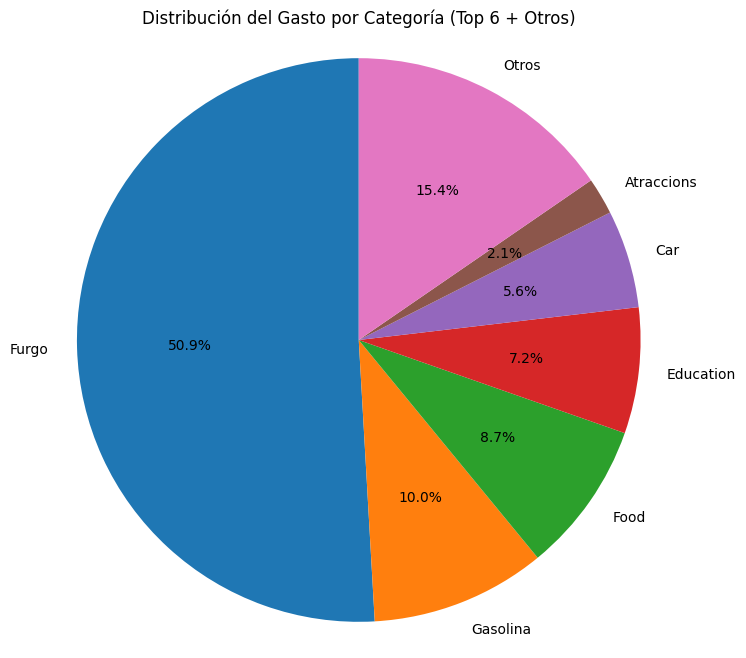

In [743]:
# Agrupar los datos por 'Category' y calcular la suma de 'Amount'
grouped_data = abs(expenses.groupby("Category")['Amount'].sum())

# Obtener las 6 principales categorías
top_6_categories = grouped_data.nlargest(6)

# Sumar las cantidades restantes bajo 'Otros'
otros_sum = grouped_data[~grouped_data.index.isin(top_6_categories.index)].sum()

# Crear una serie para 'Otros'
otros_series = pd.Series(otros_sum, index=['Otros'])

# Usar pd.concat para obtener el DataFrame final
final_data = pd.concat([top_6_categories, otros_series])

# Crear un pieplot
plt.figure(figsize=(8, 8))
plt.pie(final_data, labels=final_data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución del Gasto por Categoría (Top 6 + Otros)')
plt.axis('equal')  # Asegura que el piechart es un círculo
plt.show()

In [744]:
gastos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1062 entries, 0 to 1061
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1062 non-null   object 
 1   Income/Expenses  1062 non-null   object 
 2   Category         1062 non-null   object 
 3   Memo             1062 non-null   object 
 4   Amount           1062 non-null   float64
 5   memo_split       1062 non-null   object 
dtypes: float64(1), object(5)
memory usage: 49.9+ KB


# Descripción de los Datos

## Gastos con el tiempo

<ipython-input-745-b56b4fef1285>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenses['Date'] = pd.to_datetime(gastos['Date'])
<ipython-input-745-b56b4fef1285>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenses['YearMonth'] = expenses['Date'].dt.to_period('M')


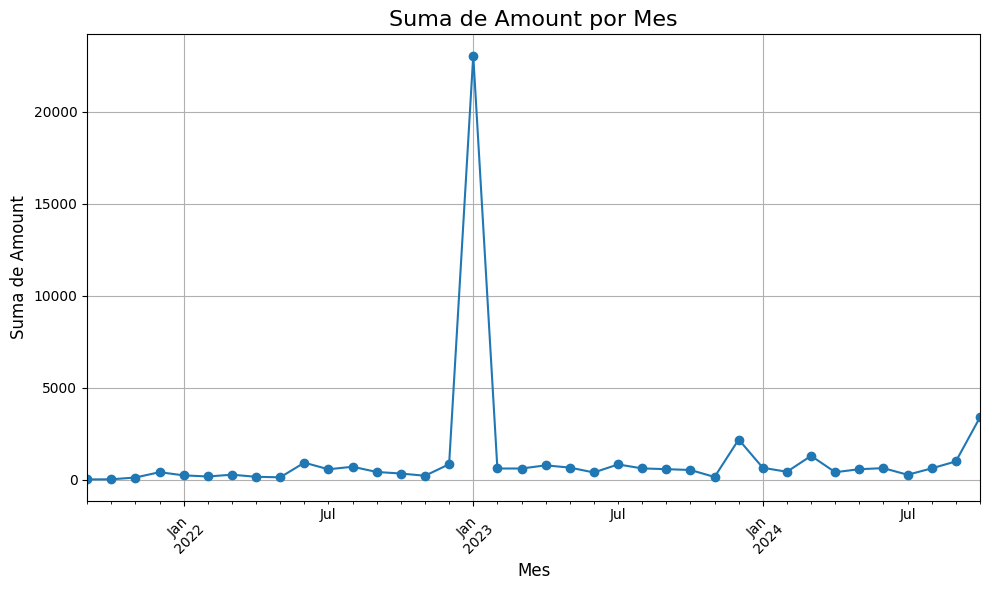

In [745]:
# Pasa la columna 'Date' a formato tipo datetime
expenses['Date'] = pd.to_datetime(gastos['Date'])

# Extraer el año y mes para agrupar por mes
expenses['YearMonth'] = expenses['Date'].dt.to_period('M')

# Agrupar por mes y calcular la suma de 'Amount'
expenses_monthly = expenses.groupby('YearMonth')['Amount'].sum()

# Gráfico de línea
plt.figure(figsize=(10, 6))
abs(expenses_monthly).plot(kind='line', marker='o')
plt.title('Suma de Amount por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Suma de Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Opel Combo Life = -22055.0 €  Fecha:  2023-01-03 00:00:00
Màster Big Data = -3060.0 €  Fecha:  2024-10-22 00:00:00
Combo. Cambi de marxes de 100 km = -990.0 €  Fecha:  2023-12-01 00:00:00
Cotxe reparació. Cambi caixa de canvis (350) + oli de caixa (50) + 21% iva, embrage nou by Noé = -484.0 €  Fecha:  2023-12-13 00:00:00


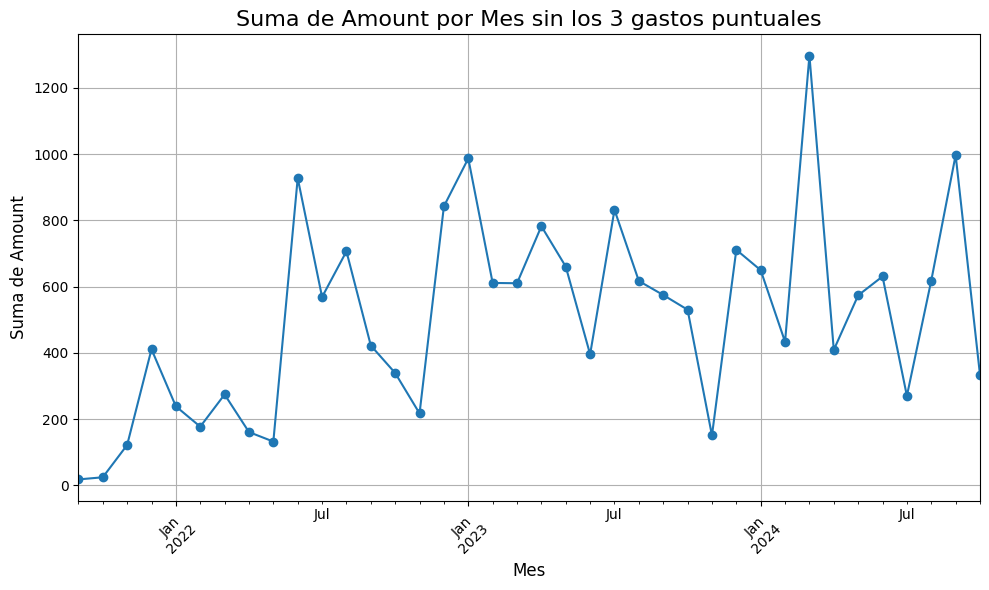

In [746]:
# Identificamos los 4 gastos puntuales (Compra coche 2023-01, Pago master 2024-10, Cambio de marchas coche 2023-12, Cambio de embrage coche 2023-12) y los quitamos
print(expenses['Memo'][expenses['Amount'].idxmin()], "=", expenses['Amount'][expenses['Amount'].idxmin()], "€", " Fecha: ", expenses['Date'][expenses['Amount'].idxmin()])
expenses_sinpuntuales = expenses.drop(index=expenses['Amount'].idxmin()) # Pago coche (22.000 €)
print(expenses_sinpuntuales['Memo'][expenses_sinpuntuales['Amount'].idxmin()], "=", expenses_sinpuntuales['Amount'][expenses_sinpuntuales['Amount'].idxmin()], "€", " Fecha: ", expenses_sinpuntuales['Date'][expenses_sinpuntuales['Amount'].idxmin()])
expenses_sinpuntuales = expenses_sinpuntuales.drop(index=expenses_sinpuntuales['Amount'].idxmin()) # Pago master
print(expenses_sinpuntuales['Memo'][expenses_sinpuntuales['Amount'].idxmin()], "=", expenses_sinpuntuales['Amount'][expenses_sinpuntuales['Amount'].idxmin()], "€", " Fecha: ", expenses_sinpuntuales['Date'][expenses_sinpuntuales['Amount'].idxmin()])
expenses_sinpuntuales = expenses_sinpuntuales.drop(index=expenses_sinpuntuales['Amount'].idxmin()) # Cambio de marchas coche
print(expenses_sinpuntuales['Memo'][expenses_sinpuntuales['Amount'].idxmin()], "=", expenses_sinpuntuales['Amount'][expenses_sinpuntuales['Amount'].idxmin()], "€", " Fecha: ", expenses_sinpuntuales['Date'][expenses_sinpuntuales['Amount'].idxmin()])
expenses_sinpuntuales = expenses_sinpuntuales.drop(index=expenses_sinpuntuales['Amount'].idxmin()) # Cambio de embrage coche

# Agrupar por mes y calcular la suma de 'Amount'
expenses_monthly_sinpuntuales = expenses_sinpuntuales.groupby('YearMonth')['Amount'].sum()

# Gráfico de línea
plt.figure(figsize=(10, 6))
abs(expenses_monthly_sinpuntuales).plot(kind='line', marker='o')
plt.title('Suma de Amount por Mes sin los 3 gastos puntuales', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Suma de Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [747]:
## Encontrar pico de marzo 2024 → CANTÀBRIA
expenses_marzo_2024 = expenses_sinpuntuales[
    (expenses_sinpuntuales['Date'].dt.year == 2024) &
    (expenses_sinpuntuales['Date'].dt.month == 3)]

# Filtrar filas donde el primer elemento de 'memo_split' es "Cantàbria 24'"
expenses_cantabria = expenses_marzo_2024[
    expenses_marzo_2024['memo_split'].apply(lambda x: isinstance(x, list) and x[0] == "Cantàbria 24'")]

# Mostrar el resultado
print("El total gastado en el viaje a 'Cantàbria 24'' sin contar la gasolina es =", round(expenses_cantabria['Amount'].sum()), "€")

El total gastado en el viaje a 'Cantàbria 24'' sin contar la gasolina es = -351 €


In [748]:
## Encontrar pico de enero 2023 → ASSEGURANÇA
expenses_enero_2023 = expenses_sinpuntuales[
    (expenses_sinpuntuales['Date'].dt.year == 2023) &
    (expenses_sinpuntuales['Date'].dt.month == 1)]

print(f"En enero de 2023 se pagó {expenses_enero_2023['Memo'][expenses_enero_2023['Amount'].idxmin()]} que supuso un gasto de {expenses_enero_2023['Amount'].min()} €")

En enero de 2023 se pagó Assegurança que supuso un gasto de -429.81 €


In [749]:
## Encontrar pico de julio 2023 → VELER
expenses_julio_2023 = expenses_sinpuntuales[
    (expenses_sinpuntuales['Date'].dt.year == 2023) &
    (expenses_sinpuntuales['Date'].dt.month == 7)]

expenses_julio_2023["Amount"].sum()

-831.8299999999999

## Gastos más frecuentes y caros

<ipython-input-750-1e102b7f4ece>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y='Palabra', data=df_palabras, palette='viridis')


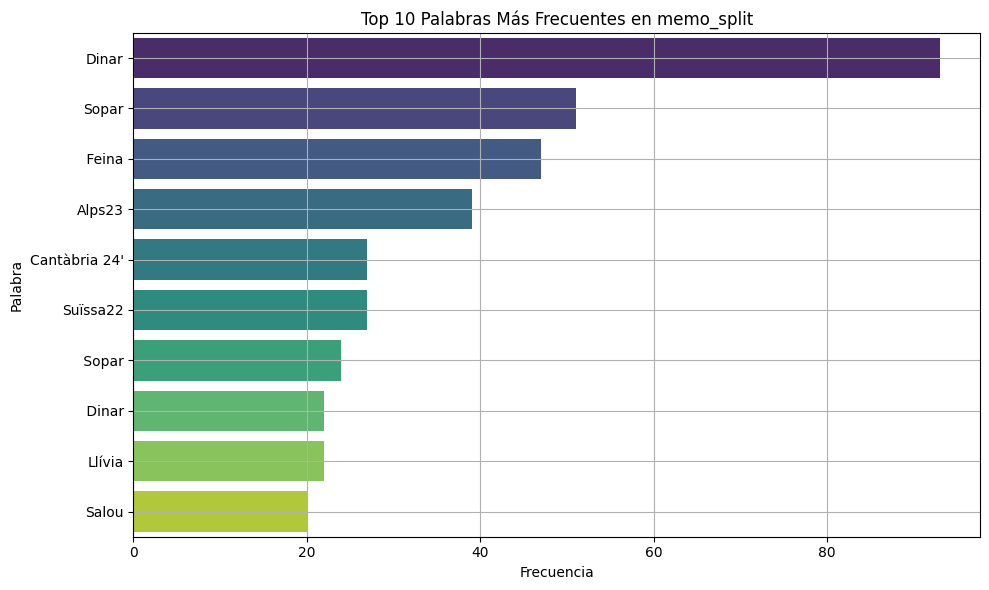

In [750]:
from collections import Counter

# Aplanar todas las listas de 'memo_split' para contar frecuencias
todas_palabras = [palabra for sublist in expenses_sinpuntuales['memo_split'] for palabra in sublist]

# Contar las ocurrencias de cada palabra
contador_palabras = Counter(todas_palabras)

# Obtener las 10 palabras más frecuentes
palabras_mas_frecuentes = contador_palabras.most_common(10)

# Crear un DataFrame para facilitar la visualización
df_palabras = pd.DataFrame(palabras_mas_frecuentes, columns=['Palabra', 'Frecuencia'])

# Generar el barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Frecuencia', y='Palabra', data=df_palabras, palette='viridis')
plt.title('Top 10 Palabras Más Frecuentes en memo_split')
plt.xlabel('Frecuencia')
plt.ylabel('Palabra')
plt.grid(True)
plt.tight_layout()
plt.show()

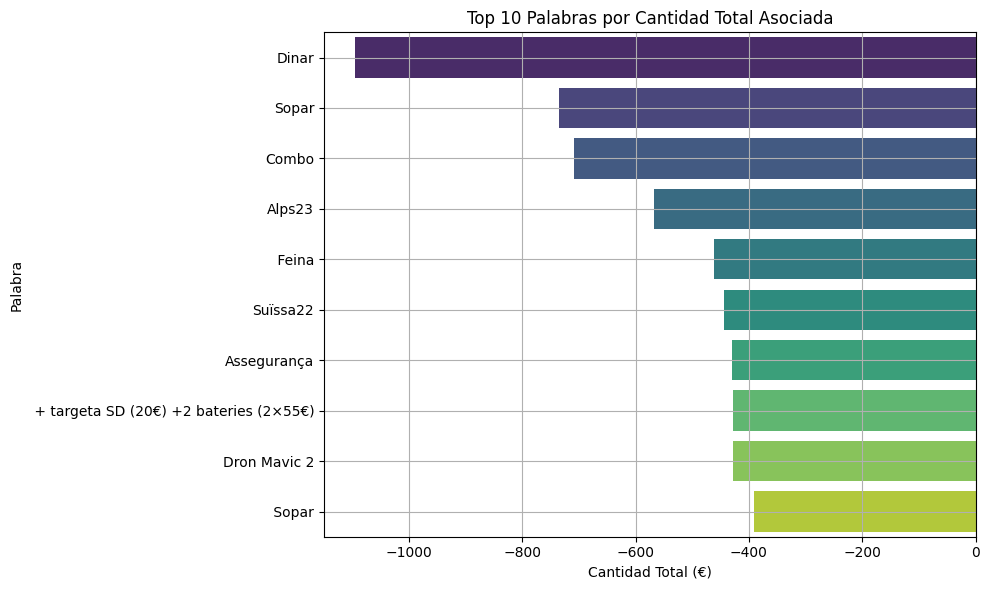

In [751]:
from collections import defaultdict

# Asegúrate de colectar los totales de las cantidades de cada palabra
palabras_cantidad = defaultdict(float)

# Iterar sobre las filas del DataFrame
for _, row in expenses_sinpuntuales.iterrows():
    # Desanidar las listas de palabras y asociar la cantidad
    words = row['memo_split']
    amount = row['Amount']
    for word in words:
        palabras_cantidad[word] += amount

# Convertir el resultado en un DataFrame
df_palabras = pd.DataFrame(list(palabras_cantidad.items()), columns=['Palabra', 'TotalAmount'])

# Ordenar por 'TotalAmount' y seleccionar las 10 principales
top_10_palabras = df_palabras.sort_values(by='TotalAmount', ascending=True).head(10)

# Generar el barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalAmount', y='Palabra', hue='Palabra', dodge=False, data=top_10_palabras, palette='viridis', legend=False)
plt.title('Top 10 Palabras por Cantidad Total Asociada')
plt.xlabel('Cantidad Total (€)')
plt.ylabel('Palabra')
plt.grid(True)
plt.tight_layout()
plt.show()

## Gastos por categoría

<Figure size 1000x600 with 0 Axes>

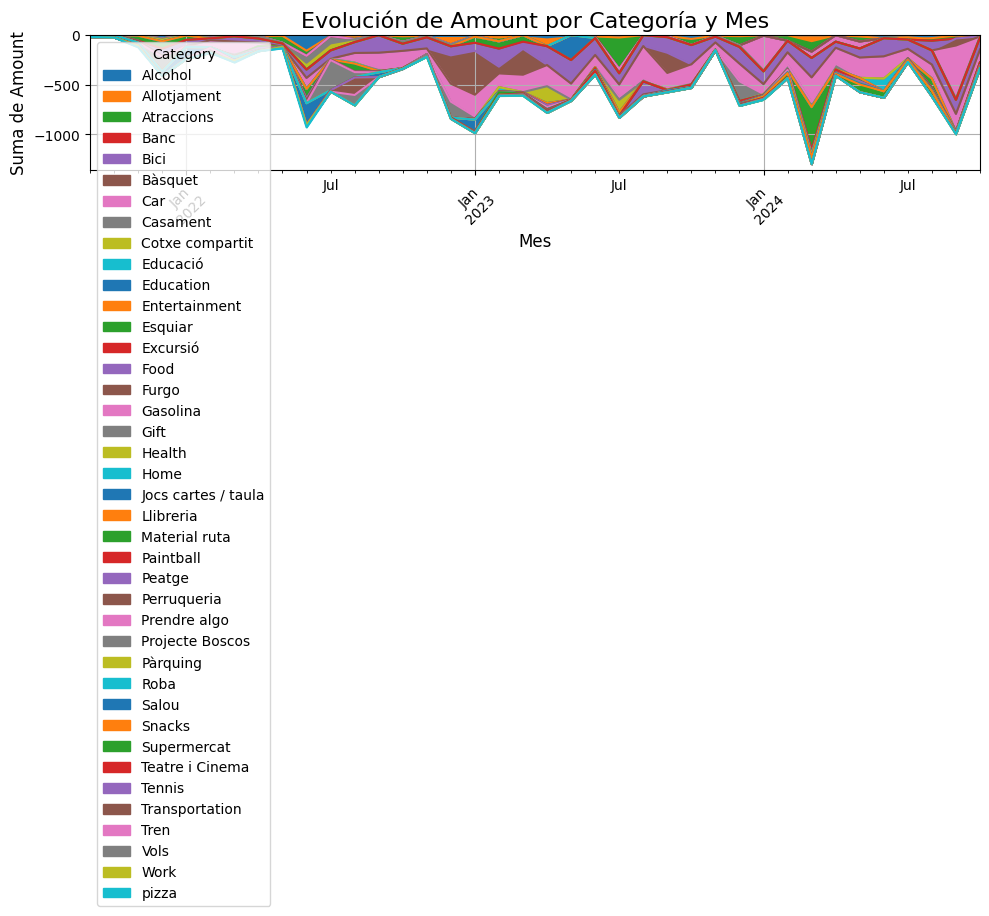

In [752]:
# Agrupar por 'YearMonth' y 'Category' para sumar 'Amount'
expenses_grouped = expenses_sinpuntuales.groupby(['YearMonth', 'Category'])['Amount'].sum().unstack(fill_value=0)

# Crear gráfico apilado
plt.figure(figsize=(10, 6))
expenses_grouped.plot(kind='area', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Evolución de Amount por Categoría y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Suma de Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [753]:
# Quitar gastos de inversion en piso o de trabajo
expenses_sinpuntuales = expenses_sinpuntuales[expenses_sinpuntuales["Category"] != "Salou"]
# expenses = expenses[expenses["Category"] != "Work"]

# Juntar categorías
def categorize(expenses):
    if expenses["Category"] in["Pàrquing", "Tren", "Vols", "Transportation", "Cotxe compartit", "Bici", "Peatge", "Car"]:
        return "Transporte"
    elif expenses["Category"] in["Food", "Snacks", "Prendre algo", "pizza", "Alcohol"]:
        return "Restaurante"
    elif expenses["Category"] in["Esquiar", "Tennis", "Bàsquet", "Teatre i Cinema", "Paintball", "jocs cartes / taula", "Entertainment", "Atraccions"]:
        return "Entretenimiento"
    elif expenses["Category"] in["Furgo", "Material ruta", "Allotjament", "Excursió"]:
        return "Ruta"
    elif expenses["Category"] in["Home", "Roba", "Health"]:
        return "Casa"
    elif expenses["Category"] in["Educació", "Education"]:
        return "Educación"
    elif expenses["Category"] in["Work", "Llibería"]:
        return "Trabajo"
    else:
        return expenses["Category"]  # Para cualquier otra categoría no definida

# Aplicar la función para crear la columna 'NewCategory'
expenses_sinpuntuales["NewCategory"] = expenses_sinpuntuales.apply(categorize, axis=1)
expenses["NewCategory"] = expenses.apply(categorize, axis=1)

<ipython-input-753-1819131997c6>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenses_sinpuntuales["NewCategory"] = expenses_sinpuntuales.apply(categorize, axis=1)
<ipython-input-753-1819131997c6>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expenses["NewCategory"] = expenses.apply(categorize, axis=1)


<Figure size 1000x600 with 0 Axes>

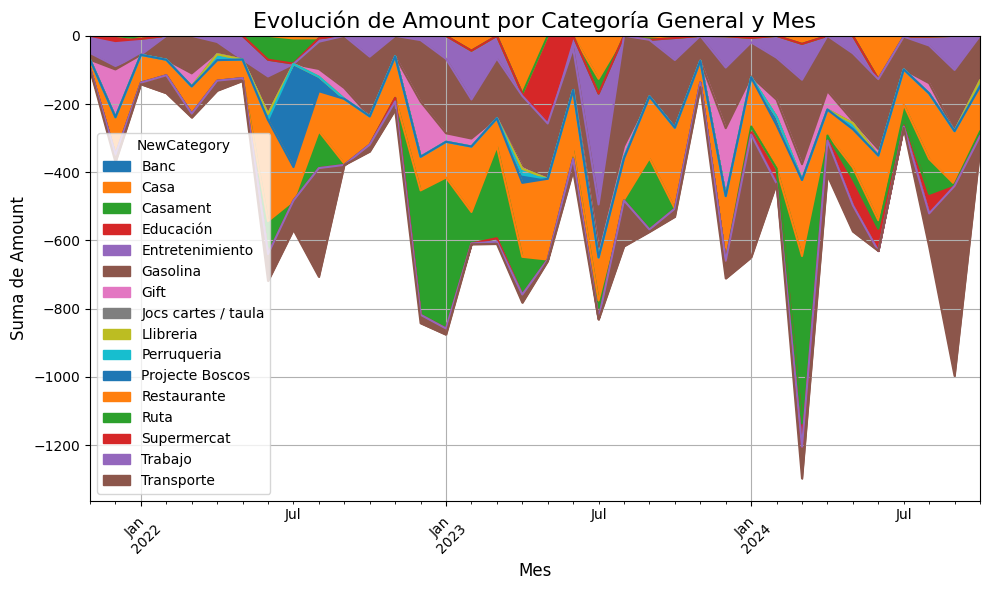

In [754]:
# Agrupar por 'YearMonth' y 'Category' para sumar 'Amount'
expenses_grouped = expenses_sinpuntuales.groupby(['YearMonth', 'NewCategory'])['Amount'].sum().unstack(fill_value=0)

# Crear gráfico apilado
plt.figure(figsize=(10, 6))
expenses_grouped.plot(kind='area', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Evolución de Amount por Categoría General y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Suma de Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [755]:
# Agrupar por 'NewCategory' y sumar 'Amount'
category_amount = expenses_sinpuntuales.groupby('NewCategory')['Amount'].sum()

# Ordenar las categorías por la cantidad de 'Amount' en orden descendente
top_categories = category_amount.sort_values(ascending=True).head(10)

# Clasificar las categorías que no están en el top 10 como 'Otras'
expenses_sinpuntuales['NewCategory'] = expenses_sinpuntuales['NewCategory'].apply(lambda x: x if x in top_categories.index else 'Otras')

<Figure size 1000x600 with 0 Axes>

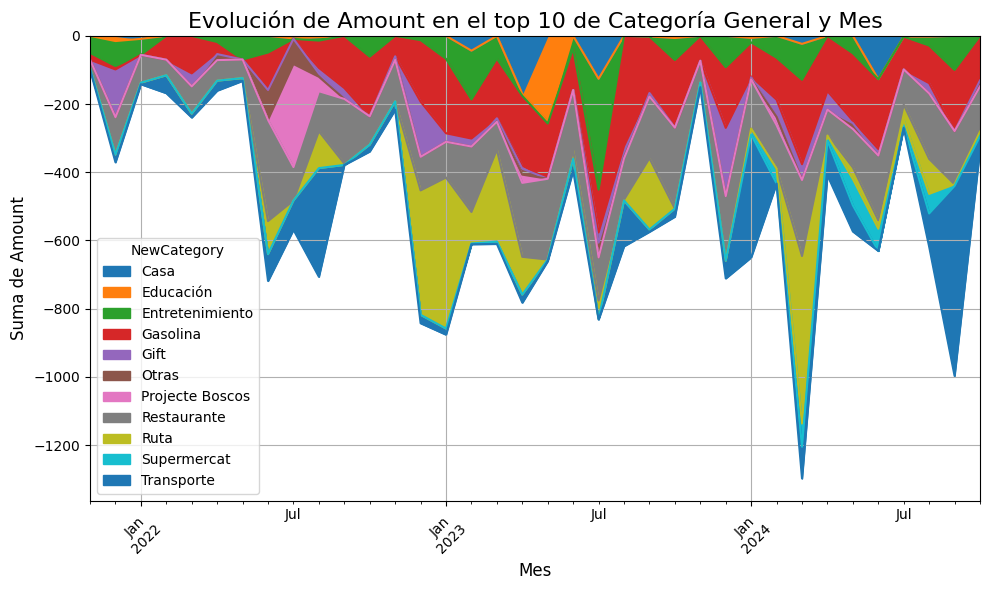

In [756]:
# Agrupar por 'YearMonth' y 'Category' para sumar 'Amount'
expenses_grouped = expenses_sinpuntuales.groupby(['YearMonth', 'NewCategory'])['Amount'].sum().unstack(fill_value=0)

# Crear gráfico apilado
plt.figure(figsize=(10, 6))
expenses_grouped.plot(kind='area', stacked=True, figsize=(10, 6))

# Personalizar el gráfico
plt.title('Evolución de Amount en el top 10 de Categoría General y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Suma de Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

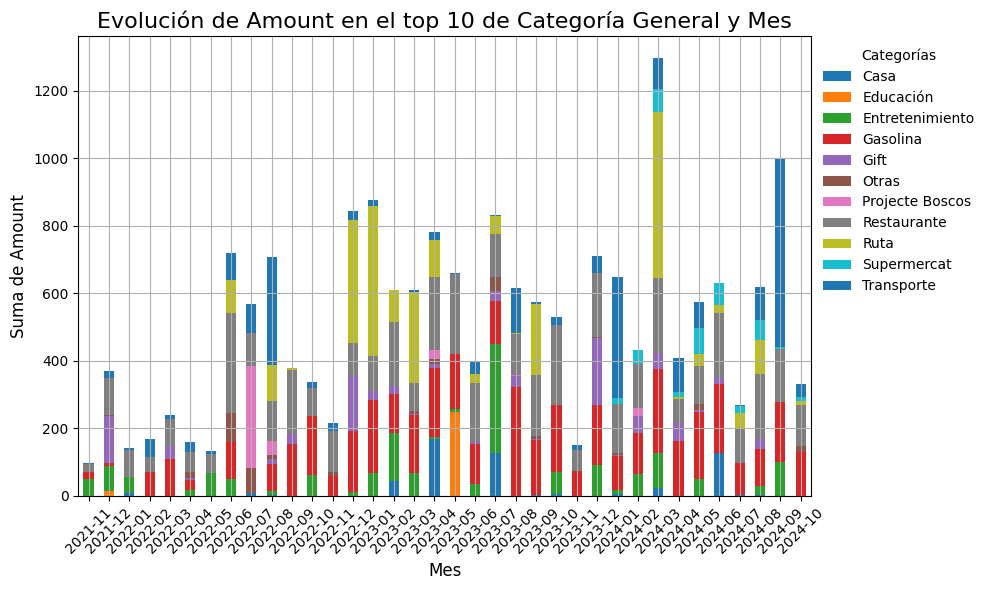

In [757]:
# Agrupar por 'YearMonth' y 'NewCategory' para sumar 'Amount'
expenses_grouped = expenses_sinpuntuales.groupby(['YearMonth', 'NewCategory'])['Amount'].sum().unstack(fill_value=0)

# Crear gráfico de barras apiladas
plt.figure(figsize=(10, 6))
ax = abs(expenses_grouped).plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Evolución de Amount en el top 10 de Categoría General y Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Suma de Amount', fontsize=12)
plt.xticks(rotation=45)  # Rotar etiquetas del eje X para mayor legibilidad
plt.grid(True)
# Ordenar la leyenda en el mismo orden de las categorías apiladas
handles, labels = ax.get_legend_handles_labels()
order = [i for i in range(len(labels))]  # Obtener el orden de las categorías
ax.legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1, 1), title="Categorías", frameon=False)

plt.tight_layout()
plt.show()

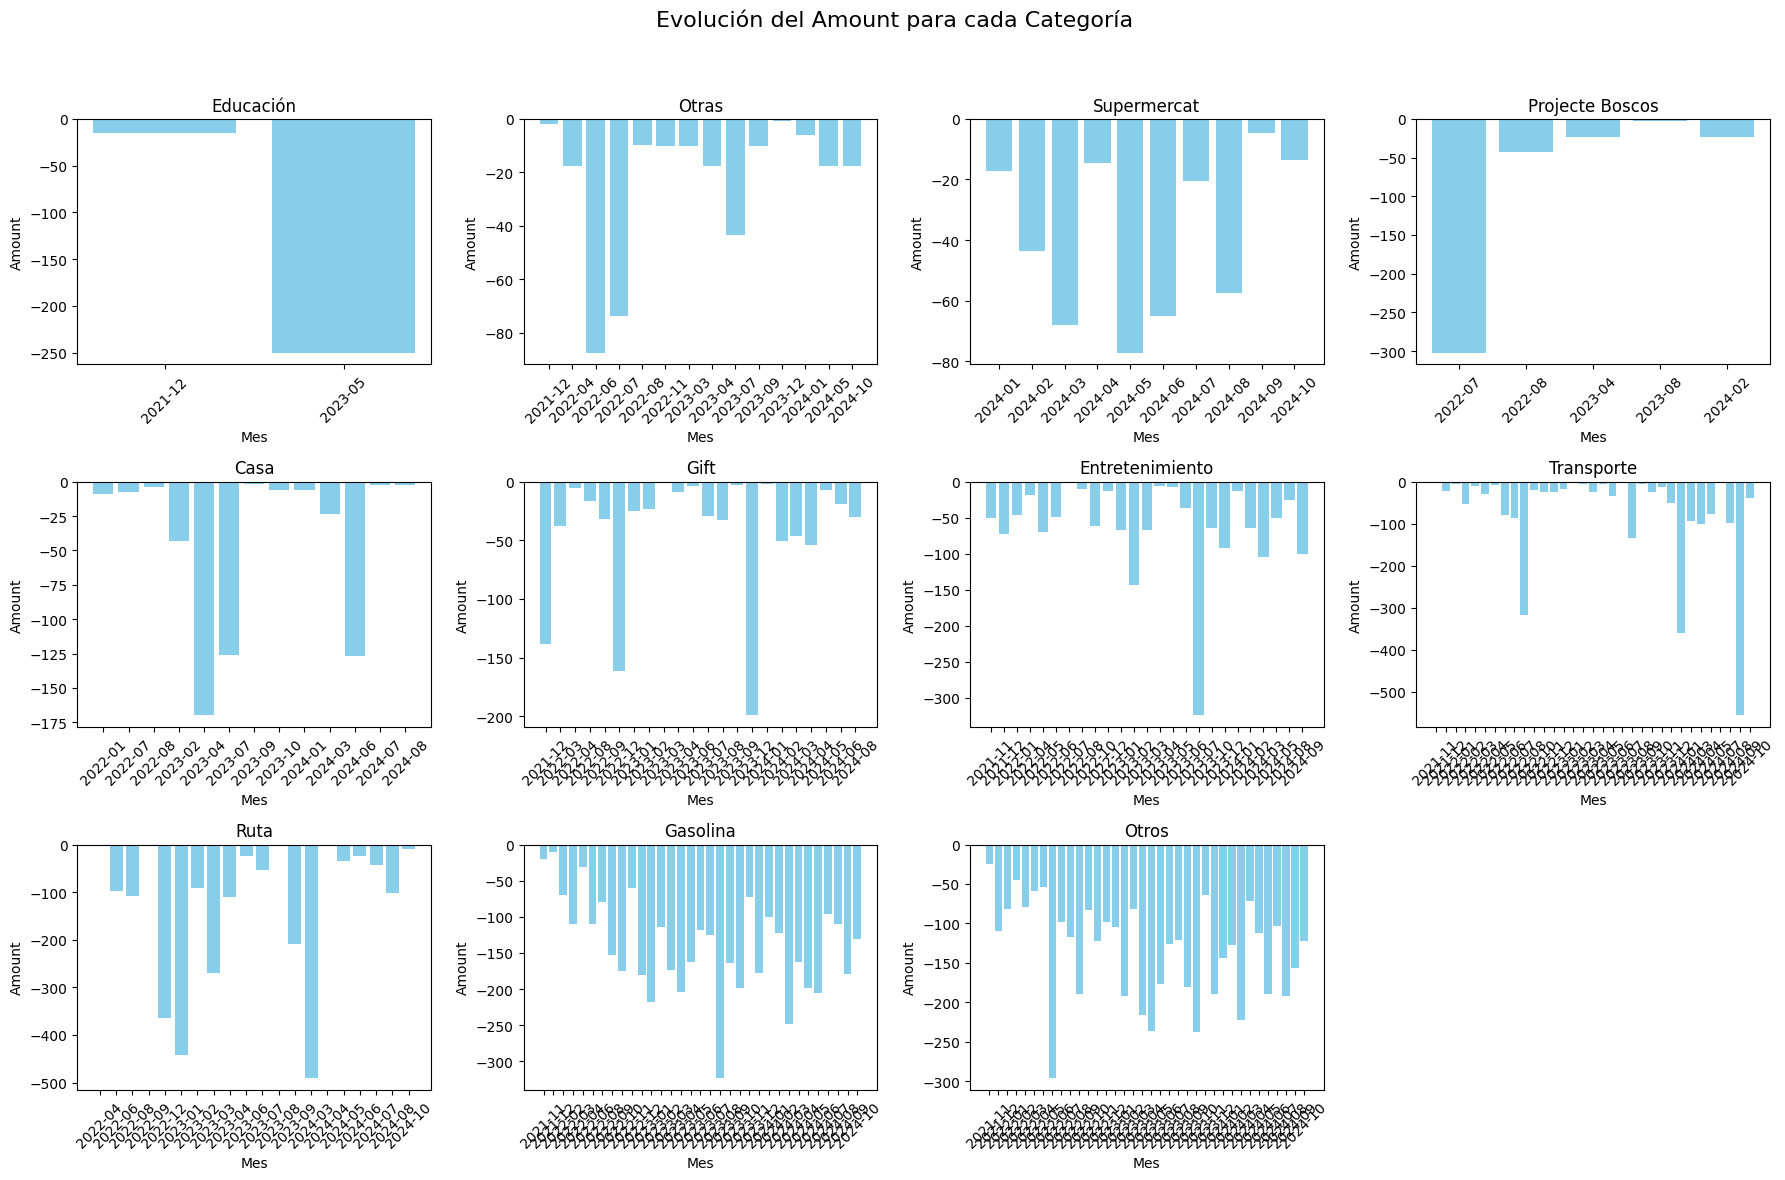

In [758]:
# Filtrar el top 10 de categorías en "NewCategory" con mayor cantidad de "Amount"
top_categories = expenses_sinpuntuales.groupby("NewCategory")["Amount"].sum().nlargest(10).index
expenses_filtered = expenses_sinpuntuales.copy()
expenses_filtered['NewCategory'] = expenses_filtered['NewCategory'].apply(lambda x: x if x in top_categories else "Otros")

# Crear la figura y los subplots
fig, axes = plt.subplots(3, 4, figsize=(18, 12))  # 3 filas x 4 columnas para un total de 12 gráficos

# Ajustar el espacio entre subplots
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Iterar sobre cada categoría y hacer un gráfico de barras
for idx, category in enumerate(top_categories.tolist() + ["Otros"]):
    ax = axes[idx // 4, idx % 4]  # Ubicación del subplot en la cuadrícula
    category_data = expenses_filtered[expenses_filtered["NewCategory"] == category]
    category_grouped = category_data.groupby("YearMonth")["Amount"].sum()

    # Convertir el índice a string o datetime correcto
    category_grouped.index = category_grouped.index.astype(str)

    # Crear el gráfico de barras para la categoría
    ax.bar(category_grouped.index, category_grouped.values, color="skyblue")
    ax.set_title(category)
    ax.set_xlabel("Mes")
    ax.set_ylabel("Amount")
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje X para mejor legibilidad

# Ocultar cualquier subplot restante que no se utilice
for ax in axes.flatten()[len(top_categories)+1:]:
    ax.set_visible(False)

# Mostrar todos los gráficos
plt.suptitle('Evolución del Amount para cada Categoría', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el layout para el título
plt.show()

<ipython-input-759-e94924a98c3a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index, palette='Paired', ax=axes[0])


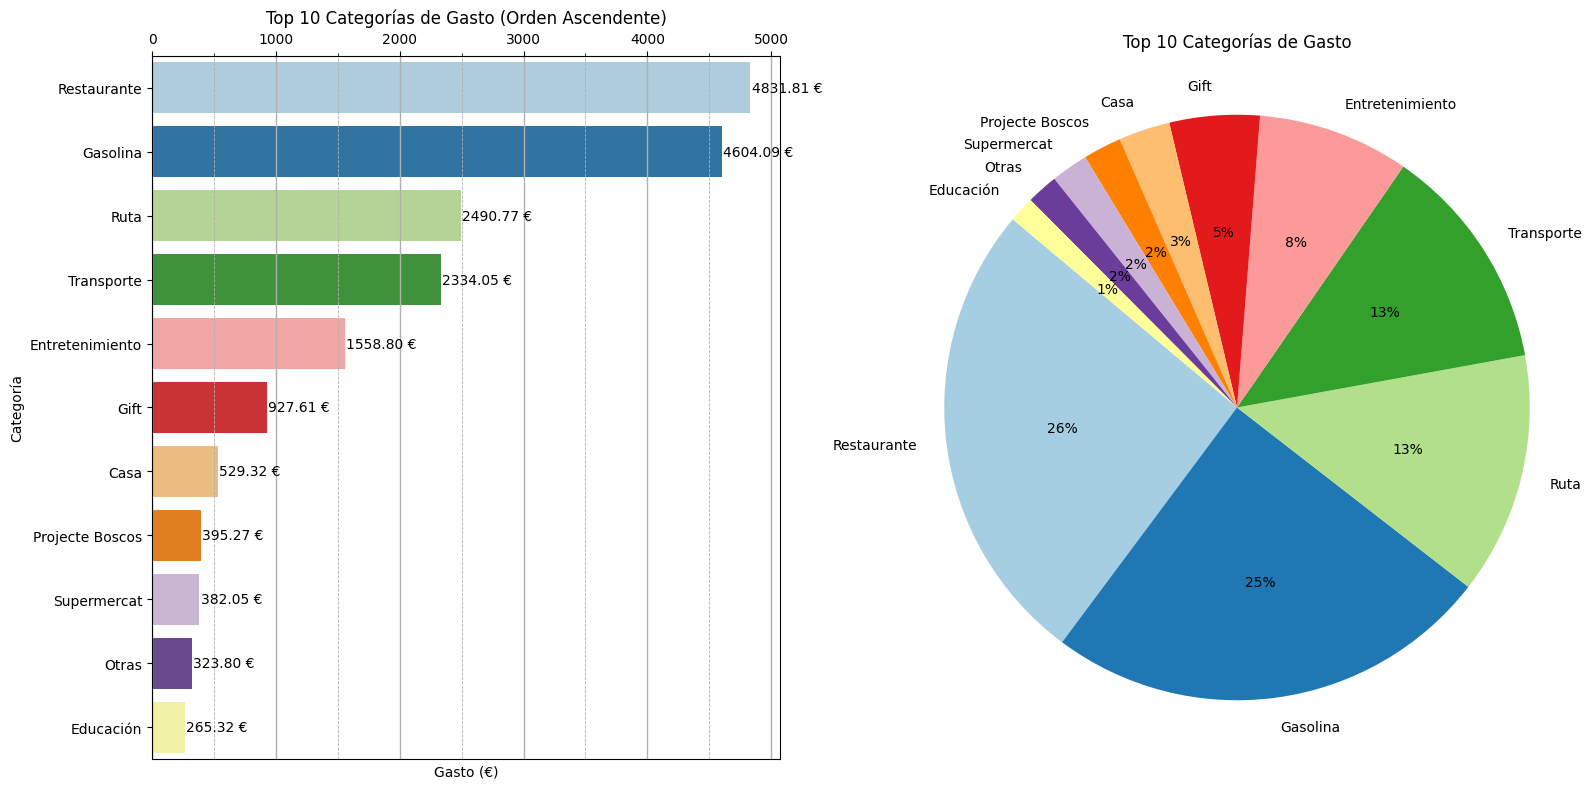

In [759]:
data = expenses_sinpuntuales.groupby('NewCategory')['Amount'].sum().sort_values(ascending=True).abs()

# Crear figura y subgráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Barplot en el primer subplot
sns.barplot(x=data.values, y=data.index, palette='Paired', ax=axes[0])
axes[0].set_title('Top 10 Categorías de Gasto (Orden Ascendente)')
axes[0].set_xlabel('Gasto (€)')
axes[0].set_ylabel('Categoría')
# Establecer los major y minor ticks
axes[0].set_xticks(np.arange(0, data.max() + 1000, 1000), minor=False)
axes[0].set_xticks(np.arange(0, data.max() + 500, 500), minor=True)
# Configurar las líneas de la cuadrícula
axes[0].grid(True, axis='x', which='major', linestyle='-', linewidth=1)
axes[0].grid(True, axis='x', which='minor', linestyle='--', linewidth=0.6)
# Mueve los valores del eje x arriba
axes[0].xaxis.tick_top()
# Añadir la cantidad de euros
for i, value in enumerate(data.values):
    axes[0].text(value + 10, i, f'{value:.2f} €', va='center')

# Pieplot en el segundo subplot
axes[1].pie(data, labels=data.index, autopct='%1.0f%%', startangle=140, colors=sns.color_palette('Paired', len(data)))
axes[1].set_title('Top 10 Categorías de Gasto')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

## Gasto de gasolina

In [760]:
coche.head()

2,Inici,Parades,Final,Motiu,Categories,Modalitat trajecte,Trajecte,Dia,Mes,Any,...,L/trajecte,Condicions,Persones,NaN,€ Omplerts,Litres Omplerts,€/L,L omperts,L consumits,NaN
0,Roses,,Figueres,Mecànic,Cotxe,NaN,Roses - Figueres,5,12,2022,...,"2,1",Camp. Safari,1,NaN,NaN,NaN,NaN,NaN,"-31,7",NaN
1,Figueres,St.Silvestre de Valleta,Figueres,Mecànic,Cotxe,NaN,Figueres - St.Silvestre de Valleta - Figueres,5,12,2022,...,"12,2",Camp. Safari,2,NaN,NaN,NaN,NaN,"0,00","-19,5",NaN
2,Teià,,Parets del Vallès,Feina,Torre de Malla,NaN,Teià - Parets del Vallès,7,12,2022,...,"1,5",Camp. Safari,1,NaN,NaN,NaN,NaN,"0,00","-18,0",NaN
3,Parets,"Vallcarca, Parets, Vallcarca, Maquinista",Teià,"Feina, Oci","Torre de Malla, Compra",NaN,Parets - Vallcarca-Parets-Vallcarca-Maquinista...,7,12,2022,...,"6,8",Camp. Safari,2,NaN,NaN,NaN,NaN,"0,00","-11,3",NaN
4,Teià,,Roses a 98km/h,Mecànic,Cotxe,NaN,Teià - Roses a 98km/h,8,12,2022,...,"6,9",Camp. Safari,1,NaN,NaN,NaN,NaN,"0,00","-4,4",NaN


In [761]:
coche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Inici               589 non-null    object 
 1   Parades             915 non-null    object 
 2   Final               589 non-null    object 
 3   Motiu               588 non-null    object 
 4   Categories          588 non-null    object 
 5   Modalitat trajecte  18 non-null     object 
 6   Trajecte            589 non-null    object 
 7   Dia                 589 non-null    object 
 8   Mes                 589 non-null    object 
 9   Any                 489 non-null    object 
 10  Km diferencia       914 non-null    object 
 11  L/100 km            589 non-null    object 
 12  €/100 km            915 non-null    object 
 13  €/trajecte          914 non-null    object 
 14  L/trajecte          915 non-null    object 
 15  Condicions          915 non-null    object 
 16  Persones

In [762]:
## Eliminar todas las filas a partir del cual hay el primer "Dia" NaN
# Identificar el índice de la primera fila con NaN en la columna 'Dia'
primer_nan_dia = coche['Dia'].isna().idxmax() if coche['Dia'].isna().any() else None

# Si existe un NaN en 'Dia', eliminar todas las filas a partir de ahí
if primer_nan_dia is not None:
    coche = coche.loc[:primer_nan_dia - 1]

## Rellenar los NaN en la columna 'Any' con 2024 si los hubiese (ya que en algunas columnas se olvidó de registrar el año que corresponde a 2024)
coche['Any'] = coche['Any'].fillna(2024)

## Eliminar columnas que tienen nombre 'nan'
coche = coche.drop(coche.columns[[17, 23]], axis=1)

coche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Inici               589 non-null    object
 1   Parades             589 non-null    object
 2   Final               589 non-null    object
 3   Motiu               588 non-null    object
 4   Categories          588 non-null    object
 5   Modalitat trajecte  18 non-null     object
 6   Trajecte            589 non-null    object
 7   Dia                 589 non-null    object
 8   Mes                 589 non-null    object
 9   Any                 589 non-null    object
 10  Km diferencia       589 non-null    object
 11  L/100 km            589 non-null    object
 12  €/100 km            589 non-null    object
 13  €/trajecte          589 non-null    object
 14  L/trajecte          589 non-null    object
 15  Condicions          589 non-null    object
 16  Persones            589 no

<ipython-input-762-de6480706599>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coche['Any'] = coche['Any'].fillna(2024)


In [763]:
print("Inicialmente:\n", coche['€/trajecte'])
## Se elimina la etiqueta ' €' de las columnas
coche['€/trajecte'] = coche['€/trajecte'].apply(lambda x: str(x).split()[0])
coche['€/trajecte'] = coche['€/trajecte'].apply(lambda x: float(x.replace(',', '.')))

coche['€/100 km'] = coche['€/100 km'].apply(lambda x: str(x).split()[0])
coche['€/100 km'] = coche['€/100 km'].apply(lambda x: float(x.replace(',', '.')))

coche['€ Omplerts'] = coche['€ Omplerts'].apply(lambda x: str(x).split()[0])
coche['€ Omplerts'] = coche['€ Omplerts'].apply(lambda x: float(x.replace(',', '.')))

print("Con los cambios:\n", coche['€/trajecte'])

## Se convierten las columnas necesarias a tipo float
columnas_a_float = ['Km diferencia', 'L/100 km', 'L/trajecte', 'Litres Omplerts', 'L omperts', 'L consumits', 'Persones']
for columna in columnas_a_float:
    coche[columna] = coche[columna].apply(lambda x: float(str(x).replace(',', '.')) if pd.notnull(x) else x)

## Se convierten las columnas necesarias a tipo int
columnas_a_entero = ['Any', 'Mes', 'Dia']
for columna in columnas_a_entero:
    coche[columna] = coche[columna].astype(int)

Inicialmente:
 0       3,05 €
1      17,88 €
2       2,16 €
3       9,91 €
4      10,10 €
        ...   
584     5,30 €
585     3,71 €
586     5,00 €
587     4,64 €
588     4,65 €
Name: €/trajecte, Length: 589, dtype: object
Con los cambios:
 0       3.05
1      17.88
2       2.16
3       9.91
4      10.10
       ...  
584     5.30
585     3.71
586     5.00
587     4.64
588     4.65
Name: €/trajecte, Length: 589, dtype: float64


In [764]:
coche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Inici               589 non-null    object 
 1   Parades             589 non-null    object 
 2   Final               589 non-null    object 
 3   Motiu               588 non-null    object 
 4   Categories          588 non-null    object 
 5   Modalitat trajecte  18 non-null     object 
 6   Trajecte            589 non-null    object 
 7   Dia                 589 non-null    int64  
 8   Mes                 589 non-null    int64  
 9   Any                 589 non-null    int64  
 10  Km diferencia       589 non-null    float64
 11  L/100 km            589 non-null    float64
 12  €/100 km            589 non-null    float64
 13  €/trajecte          589 non-null    float64
 14  L/trajecte          589 non-null    float64
 15  Condicions          589 non-null    object 
 16  Persones

## Gasto de gasolina por motivos

In [765]:
# Separar la columna 'Motiu' por comas según los distintos motivos del viaje
motivos_separados = coche['Motiu'].str.split(',', expand=True)

# Asignar las nuevas columnas con los nombres 'Motiu1', 'Motiu2', 'Motiu3', ...
motivos_separados.columns = [f'Motiu{i+1}' for i in range(motivos_separados.shape[1])]

# Concatenar las nuevas columnas con el DataFrame original
coche = pd.concat([coche, motivos_separados], axis=1)

In [766]:
# Separar la columna 'Categories' por comas según los distintos motivos del viaje
categorias_separadas = coche['Categories'].str.split(',', expand=True)

# Asignar las nuevas columnas con los nombres 'Motiu1', 'Motiu2', 'Motiu3', ...
categorias_separadas.columns = [f'Categories{i+1}' for i in range(categorias_separadas.shape[1])]

# Concatenar las nuevas columnas con el DataFrame original
coche = pd.concat([coche, categorias_separadas], axis=1)

In [767]:
# Extraer la Modalitat trajecte de la parte final del trayecto. Esa se situa entre ()
coche['Modalitat trajecte'] = coche['Final'].apply(lambda x: x.split('(')[1].replace(')', '') if '(' in x else np.NaN)


# Limpiar la columna 'Final' para obtener sólo el destino final. Sin la parte de ()
coche['Final'] = coche['Final'].str.replace(r'\s*\(.*?\)', '', regex=True)

coche[(coche["Modalitat trajecte"]=="Feina") & (coche["Categories1"]=="Pla Marcell")]

,Inici,Parades,Final,Motiu,Categories,Modalitat trajecte,Trajecte,Dia,Mes,Any,...,Litres Omplerts,€/L,L omperts,L consumits,Motiu1,Motiu2,Motiu3,Categories1,Categories2,Categories3


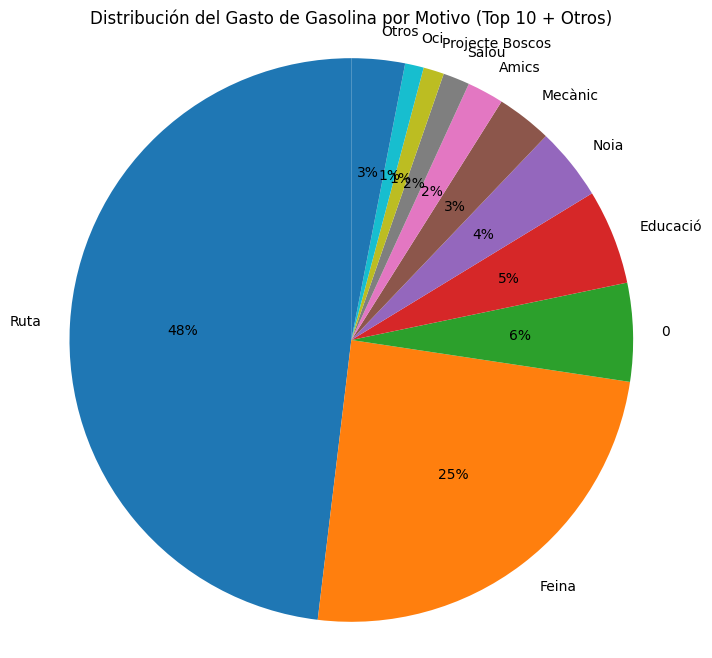

In [768]:
# Agrupar los datos por 'Motiu1' y calcular la suma de '€/trajecte'
gasto_motivo = coche.groupby('Motiu1')['€/trajecte'].sum().reset_index()

# Ordenar los datos por el valor de '€/trajecte' de mayor a menor
gasto_motivo = gasto_motivo.sort_values(by='€/trajecte', ascending=False)

# Seleccionar los 10 primeros motivos
top_10_motivos = gasto_motivo.head(10)

# Agrupar el resto en 'Otros'
otros = gasto_motivo.iloc[10:]
otros_sum = otros['€/trajecte'].sum()

# Crear un DataFrame para la categoría 'Otros'
otros_df = pd.DataFrame({'Motiu1': ['Otros'], '€/trajecte': [otros_sum]})

# Concatenar los 10 motivos principales con 'Otros'
gasto_motivo_final = pd.concat([top_10_motivos, otros_df], ignore_index=True)

# Crear un gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(gasto_motivo_final['€/trajecte'], labels=gasto_motivo_final['Motiu1'], autopct='%1.0f%%', startangle=90)
plt.title('Distribución del Gasto de Gasolina por Motivo (Top 10 + Otros)')
plt.axis('equal')
plt.show()

In [769]:
# Segmentar los datos de no ruta y no feina
others = coche[(coche["Motiu1"]!="Ruta") & (coche["Motiu1"]!="Feina")]
print(f'We have {others.shape[0]} data from diferent trips than Ruta or Feina.')

We have 211 data from diferent trips than Ruta or Feina.


In [770]:
# Segmentar los datos de ruta
ruta = coche[coche["Motiu1"]=="Ruta"]
print(f'We have {ruta.shape[0]} data from Ruta.')

We have 87 data from Ruta.


In [771]:
# Segmentar los datos de feina
feina = coche[coche["Motiu1"]=="Feina"]
print(f'We have {feina.shape[0]} data from Feina.\n')

feina_TDM = coche[(coche["Motiu1"]=="Feina") & (coche["Categories1"]=="Torre de Malla")]
print(f'We have {feina_TDM.shape[0]} data from Feina Torre de Malla.')

feina_SA = coche[(coche["Motiu1"]=="Feina") & (coche["Categories1"]=="Santa Anna")]
print(f'We have {feina_SA.shape[0]} data from Feina Santa Anna.')

feina_PM = coche[(coche["Motiu1"]=="Feina") & (coche["Categories1"]=="Pla Marcell")]
print(f'We have {feina_PM.shape[0]} data from Feina Pla Marcell.')

We have 291 data from Feina.

We have 106 data from Feina Torre de Malla.
We have 155 data from Feina Santa Anna.
We have 22 data from Feina Pla Marcell.


## Gasto de gasolina temporal



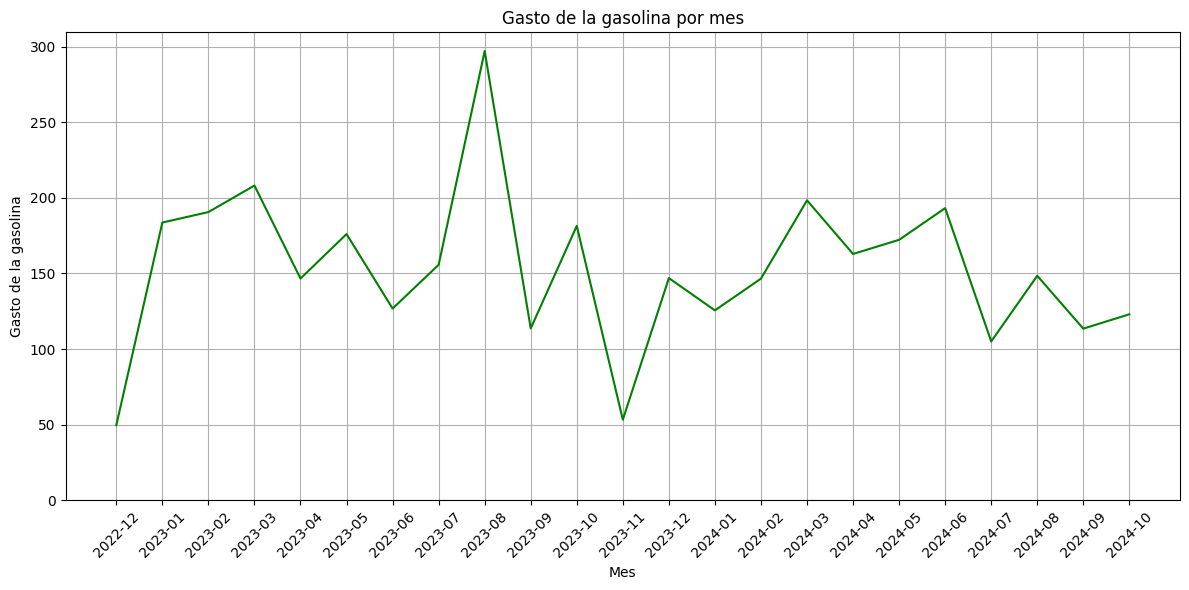

In [772]:
# Crear una nueva columna en formato 'YYYY-MM'
coche['YearMonth'] = coche['Any'].astype(str) + '-' + coche['Mes'].apply(lambda x: f'{x:02d}')

# Agrupamiento de los datos por mes
gasto_mensual = coche.groupby('YearMonth')['€/trajecte'].sum().reset_index()
gasto_mensual_ruta = coche[coche["Motiu"]=="Ruta"].groupby('YearMonth')['€/trajecte'].sum().reset_index()
gasto_mensual_feina = coche[coche["Motiu"]=="Feina"].groupby('YearMonth')['€/trajecte'].sum().reset_index()

# Crear un gráfico de línea para representar €/Trajecte por mes
plt.figure(figsize=(12, 6))
sns.lineplot(data=gasto_mensual, x='YearMonth', y='€/trajecte', color='green')
plt.title('Gasto de la gasolina por mes')
plt.xlabel('Mes')
plt.ylabel('Gasto de la gasolina')
plt.xticks(rotation=45)
plt.ylim(bottom=0) # Para que empieze en y=0
plt.grid(True)
plt.tight_layout()
plt.show()

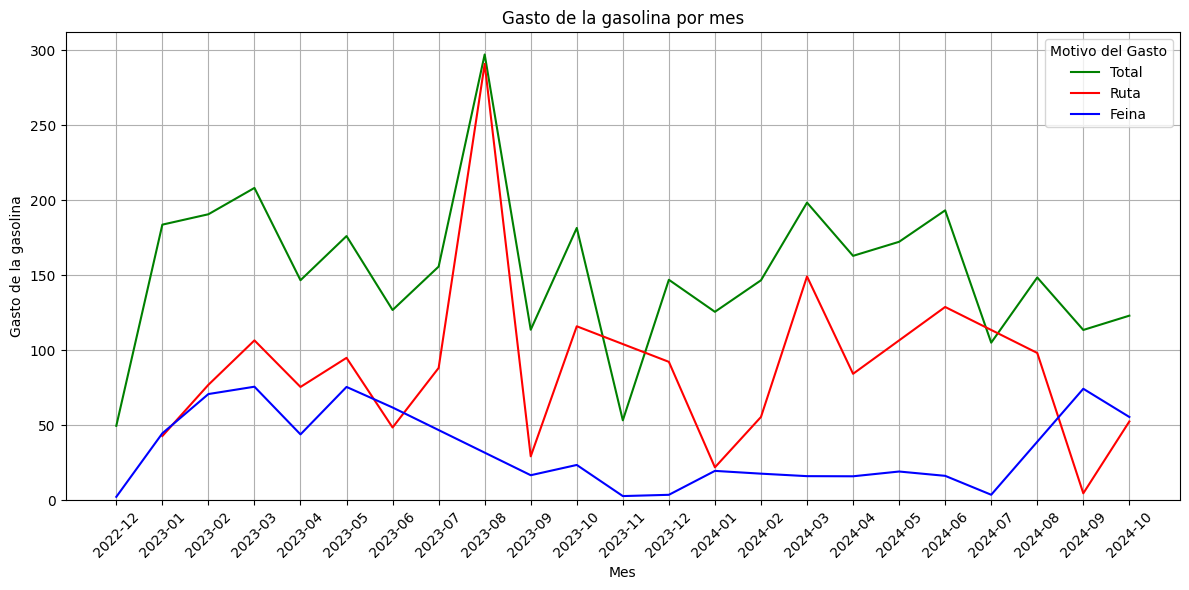

In [773]:
# Crear una nueva columna en formato 'YYYY-MM'
coche['YearMonth'] = coche['Any'].astype(str) + '-' + coche['Mes'].apply(lambda x: f'{x:02d}')

# Agrupamiento de los datos por mes
gasto_mensual = coche.groupby('YearMonth')['€/trajecte'].sum().reset_index()
gasto_mensual_ruta = coche[coche["Motiu"]=="Ruta"].groupby('YearMonth')['€/trajecte'].sum().reset_index()
gasto_mensual_feina = coche[coche["Motiu"]=="Feina"].groupby('YearMonth')['€/trajecte'].sum().reset_index()

# Crear un gráfico de línea para representar €/Trajecte por mes
plt.figure(figsize=(12, 6))
sns.lineplot(data=gasto_mensual, x='YearMonth', y='€/trajecte', color='green', label='Total')
sns.lineplot(data=gasto_mensual_ruta, x='YearMonth', y='€/trajecte', color='red', label='Ruta')
sns.lineplot(data=gasto_mensual_feina, x='YearMonth', y='€/trajecte', color='blue', label='Feina')
plt.title('Gasto de la gasolina por mes')
plt.xlabel('Mes')
plt.ylabel('Gasto de la gasolina')
plt.xticks(rotation=45)
plt.ylim(bottom=0) # Para que empieze en y=0
plt.grid(True)
plt.legend(title='Motivo del Gasto')
plt.tight_layout()
plt.show()

## 2023 a ...

- En el pie plot de Feina separar por los 2 tipos de feina (Torre de Malla, Santa Anna) + "otros"
- Graficas de barras multiples ponerlas en lineal y con todos los meses.

- Analizar de sep a junio Feina + otras rutinas
- Analizar Rutas todo el año sep a aug.

**Análisis del gráfico Gasolina por tiempo**

Sus dos principales trazos:
- Ruta: Observamos picos de subida y bajada mostrando la discontinuidad de la frecuecia y distancia de las rutas, dependiendo del momento del año. Se observa un gran pico en verano de 2023 devido al viaje a los Alpes. En verano de 2024 se alternó salidas con estudios de máster por lo que los restultados son mas bajos. En septiembre, con la entrada del trabajo, se disminuye drásticamente el consumo en las rutas.

- Feina: Se observa un trazo más constante. Se dintingue claramente que el trabajo de sept 2022 hasta junio 2023 era a Parets del Vallès (más lejos) y que de sept 2023 hasta junio 2024 era a Premià de Dalt (más cerca). Ahora, a partir de sept 2024 se vuelve a trabajar lejos (Cardedeu).

En nov y dic 2023 el coche "Opel Combo" estaba en repación de cambio de marchas. Por eso, bajó el consumo de Feina en esos días. Al añadir datos de los otros coches que se usaron, se espera recuperar unos resultados similares en nov y dic 2023. También se espera ampliar los datos desde sep 2022.

## Gasto de gasolina Subaru

In [774]:
subaru = pd.read_csv(ruta_principal + 'Despeses - Subaru.csv')

In [775]:
# Asignar los valores de la segunda fila (índice 1) como nombres de columna
subaru.columns = subaru.iloc[0]

# Eliminar la primera fila
subaru = subaru.drop(index=[0])

# Reiniciar el índice para que comience desde 0 después de eliminar filas
subaru = subaru.reset_index(drop=True)

subaru.tail(2)

,Dia,Mes,Any,Trajecte,€/trajecte,L/trajecte,Km B,L/100 km,€/100 km,NaN,NaN,€ Omplerts,Litres Omplerts,€/L,NaN,NaN,NaN,Km,Km diferència,km fets
496,NaN,NaN,2023,NaN,"0,00 €",NaN,NaN,NaN,"0,00 €","240,8",NaN,NaN,NaN,NaN,"220,94",NaN,NaN,NaN,NaN,NaN
497,NaN,NaN,2023,NaN,"0,00 €",NaN,NaN,NaN,"0,00 €","240,8",NaN,NaN,NaN,NaN,"220,94",NaN,NaN,NaN,NaN,NaN


In [776]:
## Eliminar todas las filas a partir del cual hay el primer "Dia" NaN
# Identificar el índice de la primera fila con NaN en la columna 'Dia'
primer_nan_dia = subaru['Dia'].isna().idxmax() if subaru['Dia'].isna().any() else None

# Si existe un NaN en 'Dia', eliminar todas las filas a partir de ahí
if primer_nan_dia is not None:
    subaru = subaru.loc[:primer_nan_dia - 1]

subaru.tail(2)

,Dia,Mes,Any,Trajecte,€/trajecte,L/trajecte,Km B,L/100 km,€/100 km,NaN,NaN,€ Omplerts,Litres Omplerts,€/L,NaN,NaN,NaN,Km,Km diferència,km fets
56,5,12,2023,Teià-Premià de Dalt-Teià,"1,32 €","0,8","10,9","7,4","12,08 €","237,7",NaN,NaN,NaN,NaN,"220,94",NaN,NaN,NaN,NaN,NaN
57,5,12,2023,Teià - La Salle - Teià,"5,04 €","3,1","46,8","6,6","10,78 €","240,8",NaN,NaN,NaN,NaN,"220,94",NaN,NaN,NaN,NaN,NaN


In [777]:
subaru = subaru[['Dia', 'Mes', 'Any', 'Trajecte', '€/trajecte', '€/100 km', 'L/trajecte', 'Km B', 'L/100 km', '€ Omplerts', 'Litres Omplerts', '€/L']]

In [778]:
## Se elimina la etiqueta ' €' de las columnas
subaru['€/trajecte'] = subaru['€/trajecte'].apply(lambda x: str(x).split()[0])
subaru['€/trajecte'] = subaru['€/trajecte'].apply(lambda x: float(x.replace(',', '.')))

subaru['€/100 km'] = subaru['€/100 km'].apply(lambda x: str(x).split()[0])
subaru['€/100 km'] = subaru['€/100 km'].apply(lambda x: float(x.replace(',', '.')))

subaru['€ Omplerts'] = subaru['€ Omplerts'].apply(lambda x: str(x).split()[0])
subaru['€ Omplerts'] = subaru['€ Omplerts'].apply(lambda x: float(x.replace(',', '.')))

## Se convierten las columnas necesarias a tipo float
columnas_a_float = ['Km B', 'L/100 km', 'L/trajecte', 'Litres Omplerts']
for columna in columnas_a_float:
    subaru[columna] = subaru[columna].apply(lambda x: float(str(x).replace(',', '.')) if pd.notnull(x) else x)

## Se convierten las columnas necesarias a tipo int
columnas_a_entero = ['Any', 'Mes', 'Dia']
for columna in columnas_a_entero:
    subaru[columna] = subaru[columna].astype(int)

<ipython-input-778-7b26f0eed155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subaru['€/trajecte'] = subaru['€/trajecte'].apply(lambda x: str(x).split()[0])
<ipython-input-778-7b26f0eed155>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subaru['€/trajecte'] = subaru['€/trajecte'].apply(lambda x: float(x.replace(',', '.')))
<ipython-input-778-7b26f0eed155>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [779]:
# Crear una nueva columna en formato 'YYYY-MM'
coche['YearMonth'] = coche['Any'].astype(str) + '-' + coche['Mes'].apply(lambda x: f'{x:02d}')
subaru['YearMonth'] = subaru['Any'].astype(str) + '-' + subaru['Mes'].apply(lambda x: f'{x:02d}')

# Agrupamiento de los datos por mes
gasto_mensual = coche.groupby('YearMonth')['€/trajecte'].sum().reset_index()
gasto_mensual_ruta = coche[coche["Motiu"]=="Ruta"].groupby('YearMonth')['€/trajecte'].sum().reset_index()
gasto_mensual_feina = coche[coche["Motiu"]=="Feina"].groupby('YearMonth')['€/trajecte'].sum().reset_index()
gasto_mensual_subaru = subaru.groupby('YearMonth')['€/trajecte'].sum().reset_index()

<ipython-input-779-73bc39b6654c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subaru['YearMonth'] = subaru['Any'].astype(str) + '-' + subaru['Mes'].apply(lambda x: f'{x:02d}')


In [780]:
## Queremos agregar todos los YearMonth en subaru.
# Paso 1: Obtener las fechas únicas de coche["YearMonth"]
fechas_coche = coche['YearMonth'].unique()

# Paso 2: Obtener las fechas únicas de subaru["YearMonth"]
fechas_subaru = subaru['YearMonth'].unique()

# Paso 3: Encontrar las fechas que faltan en subaru["YearMonth"]
fechas_faltantes = set(fechas_coche) - set(fechas_subaru)

# Paso 4: Crear un DataFrame con las fechas faltantes y asignarles valores predeterminados en las demás columnas
df_faltantes = pd.DataFrame({'YearMonth': list(fechas_faltantes)})
df_faltantes['€/trajecte'] = 0

# Paso 5: Concatenar las fechas faltantes con subaru
gasto_mensual_subaru = pd.concat([gasto_mensual_subaru, df_faltantes], ignore_index=True)

# Paso 6: Ordenar por "YearMonth"
gasto_mensual_subaru = gasto_mensual_subaru.sort_values(by='YearMonth')

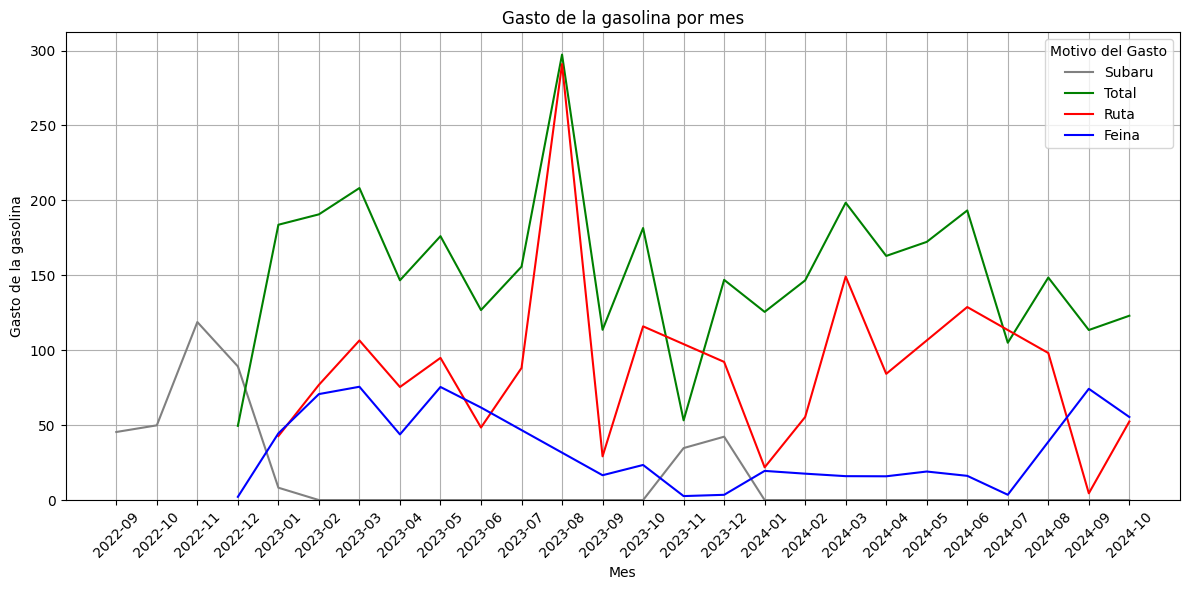

In [781]:
# Crear un gráfico de línea para representar €/Trajecte por mes
plt.figure(figsize=(12, 6))
sns.lineplot(data=gasto_mensual_subaru, x='YearMonth', y='€/trajecte', color='grey', label='Subaru')
sns.lineplot(data=gasto_mensual, x='YearMonth', y='€/trajecte', color='green', label='Total')
sns.lineplot(data=gasto_mensual_ruta, x='YearMonth', y='€/trajecte', color='red', label='Ruta')
sns.lineplot(data=gasto_mensual_feina, x='YearMonth', y='€/trajecte', color='blue', label='Feina')
plt.title('Gasto de la gasolina por mes')
plt.xlabel('Mes')
plt.ylabel('Gasto de la gasolina')
plt.xticks(rotation=45)
plt.ylim(bottom=0) # Para que empieze en y=0
plt.grid(True)
plt.legend(title='Motivo del Gasto')
plt.tight_layout()
plt.show()

## Gasto de gasolina Pixo

In [782]:
pixo = pd.read_csv(ruta_principal + 'Despeses - Pixo.csv')

In [783]:
# Asignar los valores de la segunda fila (índice 1) como nombres de columna
pixo.columns = pixo.iloc[0]

# Eliminar la primera fila
pixo = pixo.drop(index=[0])

# Reiniciar el índice para que comience desde 0 después de eliminar filas
pixo = pixo.reset_index(drop=True)

pixo.tail(2)

,Dia,Mes,Any,Trajecte,€/trajecte,L/trajecte,Km B,Km B,L/100 km,L/100 km,...,NaN,€ Omplerts,Litres Omplerts,€/L,NaN,NaN,NaN,Km,Km diferència,km fets
496,NaN,NaN,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,NaN,NaN,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [784]:
## Eliminar todas las filas a partir del cual hay el primer "Dia" NaN
# Identificar el índice de la primera fila con NaN en la columna 'Dia'
primer_nan_dia = pixo['Dia'].isna().idxmax() if pixo['Dia'].isna().any() else None

# Si existe un NaN en 'Dia', eliminar todas las filas a partir de ahí
if primer_nan_dia is not None:
    pixo = pixo.loc[:primer_nan_dia - 1]

pixo.tail(2)

,Dia,Mes,Any,Trajecte,€/trajecte,L/trajecte,Km B,Km B,L/100 km,L/100 km,...,NaN,€ Omplerts,Litres Omplerts,€/L,NaN,NaN,NaN,Km,Km diferència,km fets
14,13,9,2024,Teià - Pineda de Mar - Teià,"15,16 €","11,5",230,NaN,05,"5,00",...,NaN,NaN,NaN,NaN,"103,93",NaN,NaN,191968,4,NaN
15,13,9,2024,Teià - La Salle - Teià,"0,00 €","0,0",39,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"103,93",NaN,NaN,191971,3,NaN


In [785]:
pixo = pixo[['Dia', 'Mes', 'Any', 'Trajecte', '€/trajecte', '€/100 km', 'L/trajecte', 'Km B', 'L/100 km', '€ Omplerts', 'Litres Omplerts', '€/L']]

In [786]:
# Se elimina la etiqueta ' €' de las columnas y se manejan los valores nulos
pixo['€/trajecte'] = pixo['€/trajecte'].apply(lambda x: str(x).split()[0] if pd.notnull(x) else x)
pixo['€/trajecte'] = pixo['€/trajecte'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) and pd.notnull(x) else x)

pixo['€/100 km'] = pixo['€/100 km'].apply(lambda x: str(x).split()[0] if pd.notnull(x) else x)
pixo['€/100 km'] = pixo['€/100 km'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) and pd.notnull(x) else x)

pixo['€ Omplerts'] = pixo['€ Omplerts'].apply(lambda x: str(x).split()[0] if pd.notnull(x) else x)
pixo['€ Omplerts'] = pixo['€ Omplerts'].apply(lambda x: float(x.replace(',', '.')) if isinstance(x, str) and pd.notnull(x) else x)

## Se convierten las columnas necesarias a tipo float, manejando valores nulos
columnas_a_float = ['Km B', 'L/100 km', 'L/trajecte', 'Litres Omplerts']
for columna in columnas_a_float:
    pixo[columna] = pixo[columna].apply(lambda x: float(str(x).replace(',', '.')) if isinstance(x, (int, float, str)) and pd.notnull(x) else x)

## Se convierten las columnas necesarias a tipo int, manejando valores nulos
columnas_a_entero = ['Any', 'Mes', 'Dia']
for columna in columnas_a_entero:
    pixo[columna] = pixo[columna].apply(lambda x: pd.to_numeric(x, errors='coerce', downcast='integer') if pd.notnull(x) else x)

In [787]:
# Crear una nueva columna en formato 'YYYY-MM'
coche['YearMonth'] = coche['Any'].astype(str) + '-' + coche['Mes'].apply(lambda x: f'{x:02d}')
pixo['YearMonth'] = pixo['Any'].astype(str) + '-' + pixo['Mes'].apply(lambda x: f'{x:02d}')

# Agrupamiento de los datos por mes
gasto_mensual = coche.groupby('YearMonth')['€/trajecte'].sum().reset_index()
gasto_mensual_ruta = coche[coche["Motiu"]=="Ruta"].groupby('YearMonth')['€/trajecte'].sum().reset_index()
gasto_mensual_feina = coche[coche["Motiu"]=="Feina"].groupby('YearMonth')['€/trajecte'].sum().reset_index()
gasto_mensual_pixo = pixo.groupby('YearMonth')['€/trajecte'].sum().reset_index()

In [788]:
## Queremos agregar todos los YearMonth en pixo.
# Paso 1: Obtener las fechas únicas de coche["YearMonth"]
fechas_coche = coche['YearMonth'].unique()

# Paso 2: Obtener las fechas únicas de pixo["YearMonth"]
fechas_pixo = pixo['YearMonth'].unique()

# Paso 3: Encontrar las fechas que faltan en pixo["YearMonth"]
fechas_faltantes = set(fechas_coche) - set(fechas_pixo)

# Paso 4: Crear un DataFrame con las fechas faltantes y asignarles valores predeterminados en las demás columnas
df_faltantes = pd.DataFrame({'YearMonth': list(fechas_faltantes)})
df_faltantes['€/trajecte'] = 0

# Paso 5: Concatenar las fechas faltantes con pixo
gasto_mensual_pixo = pd.concat([gasto_mensual_pixo, df_faltantes], ignore_index=True)

# Paso 6: Ordenar por "YearMonth"
gasto_mensual_pixo = gasto_mensual_pixo.sort_values(by='YearMonth')

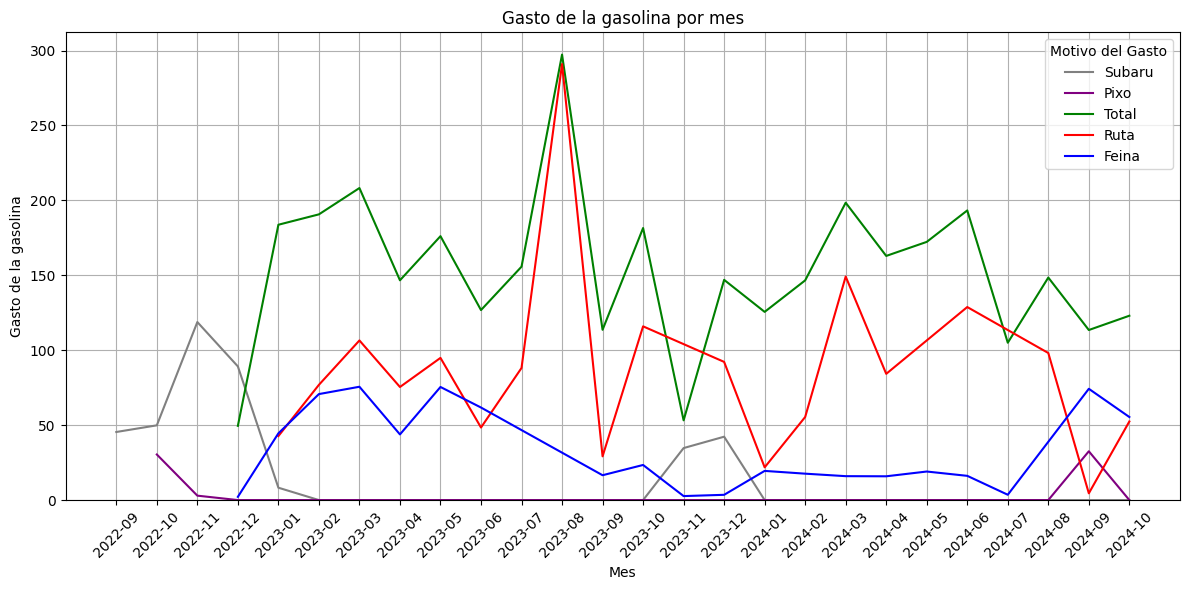

In [789]:
# Crear un gráfico de línea para representar €/Trajecte por mes
plt.figure(figsize=(12, 6))
sns.lineplot(data=gasto_mensual_subaru, x='YearMonth', y='€/trajecte', color='grey', label='Subaru')
sns.lineplot(data=gasto_mensual_pixo, x='YearMonth', y='€/trajecte', color='purple', label='Pixo')
sns.lineplot(data=gasto_mensual, x='YearMonth', y='€/trajecte', color='green', label='Total')
sns.lineplot(data=gasto_mensual_ruta, x='YearMonth', y='€/trajecte', color='red', label='Ruta')
sns.lineplot(data=gasto_mensual_feina, x='YearMonth', y='€/trajecte', color='blue', label='Feina')
plt.title('Gasto de la gasolina por mes')
plt.xlabel('Mes')
plt.ylabel('Gasto de la gasolina')
plt.xticks(rotation=45)
plt.ylim(bottom=0) # Para que empieze en y=0
plt.grid(True)
plt.legend(title='Motivo del Gasto')
plt.tight_layout()
plt.show()

# Predicción de los gastos

## Predicción de los gastos de transporte por Feina Pla Marcell

In [790]:
feina_PM.columns

Index(['Inici', 'Parades', 'Final', 'Motiu', 'Categories',
       'Modalitat trajecte', 'Trajecte', 'Dia', 'Mes', 'Any', 'Km diferencia',
       'L/100 km', '€/100 km', '€/trajecte', 'L/trajecte', 'Condicions',
       'Persones', '€ Omplerts', 'Litres Omplerts', '€/L', 'L omperts',
       'L consumits', 'Motiu1', 'Motiu2', 'Motiu3', 'Categories1',
       'Categories2', 'Categories3'],
      dtype='object')

In [791]:
feina_PM.head()

,Inici,Parades,Final,Motiu,Categories,Modalitat trajecte,Trajecte,Dia,Mes,Any,...,Litres Omplerts,€/L,L omperts,L consumits,Motiu1,Motiu2,Motiu3,Categories1,Categories2,Categories3
557,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.92,Teià - Cardedeu - Teià (S.92),19,9,2024,...,NaN,NaN,2417.12,2357.3,Feina,None,None,Pla Marcell,None,None
558,Teià,Cardedeu,Teià,Feina,Pla Marcell,Barcelona anada,Teià - Cardedeu - Teià (Barcelona anada),20,9,2024,...,NaN,NaN,2417.12,2361.7,Feina,None,None,Pla Marcell,None,None
559,Teià,Cardedeu,Teià,Feina,Pla Marcell,NII,Teià - Cardedeu - Teià (NII),23,9,2024,...,NaN,NaN,2417.12,2365.6,Feina,None,None,Pla Marcell,None,None
560,Teià,Cardedeu,Teià,Feina,Pla Marcell,Barcelona anada,Teià - Cardedeu - Teià (Barcelona anada),24,9,2024,...,NaN,NaN,2417.12,2369.1,Feina,None,None,Pla Marcell,None,None
561,Teià,"Cardedeu, GMOil",Teià,Feina,Pla Marcell,"Barcelona anada, gasolinera",Teià - Cardedeu - GMOil - Teià (Barcelona anad...,25,9,2024,...,37.48,"1,249",2454.60,2372.6,Feina,None,None,Pla Marcell,None,None


In [792]:
## Lineal regresor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = feina_PM.copy()

# Separar en características y objetivo
X = df[['Km diferencia', 'L/100 km']]
y = df['€/trajecte']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo
modelo.fit(X_train, y_train)

# Predecir en el conjunto de prueba
predicciones = modelo.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predicciones)
print(f"Error cuadrático medio: {mse}")

Error cuadrático medio: 0.0012957127092278202


In [793]:
## Decision regresor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = coche.copy()
# Separar en características y objetivo
X = df[['Km diferencia', 'L/100 km']]
y = df['€/trajecte']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión con Decision Tree
modelo_dtr = DecisionTreeRegressor(random_state=42)

# Ajustar el modelo a los datos de entrenamiento
modelo_dtr.fit(X_train, y_train)

# Predecir valores en el conjunto de prueba
y_pred = modelo_dtr.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio: {mse:.2f}")
print(f"Coeficiente de determinación R^2: {r2:.2f}")

Error cuadrático medio: 0.51
Coeficiente de determinación R^2: 0.99


In [794]:
feina_PM.head()

,Inici,Parades,Final,Motiu,Categories,Modalitat trajecte,Trajecte,Dia,Mes,Any,...,Litres Omplerts,€/L,L omperts,L consumits,Motiu1,Motiu2,Motiu3,Categories1,Categories2,Categories3
557,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.92,Teià - Cardedeu - Teià (S.92),19,9,2024,...,NaN,NaN,2417.12,2357.3,Feina,None,None,Pla Marcell,None,None
558,Teià,Cardedeu,Teià,Feina,Pla Marcell,Barcelona anada,Teià - Cardedeu - Teià (Barcelona anada),20,9,2024,...,NaN,NaN,2417.12,2361.7,Feina,None,None,Pla Marcell,None,None
559,Teià,Cardedeu,Teià,Feina,Pla Marcell,NII,Teià - Cardedeu - Teià (NII),23,9,2024,...,NaN,NaN,2417.12,2365.6,Feina,None,None,Pla Marcell,None,None
560,Teià,Cardedeu,Teià,Feina,Pla Marcell,Barcelona anada,Teià - Cardedeu - Teià (Barcelona anada),24,9,2024,...,NaN,NaN,2417.12,2369.1,Feina,None,None,Pla Marcell,None,None
561,Teià,"Cardedeu, GMOil",Teià,Feina,Pla Marcell,"Barcelona anada, gasolinera",Teià - Cardedeu - GMOil - Teià (Barcelona anad...,25,9,2024,...,37.48,"1,249",2454.60,2372.6,Feina,None,None,Pla Marcell,None,None


In [795]:
feina_PM[feina_PM["Modalitat trajecte"] == "S.92"]

,Inici,Parades,Final,Motiu,Categories,Modalitat trajecte,Trajecte,Dia,Mes,Any,...,Litres Omplerts,€/L,L omperts,L consumits,Motiu1,Motiu2,Motiu3,Categories1,Categories2,Categories3
557,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.92,Teià - Cardedeu - Teià (S.92),19,9,2024,...,NaN,NaN,2417.12,2357.3,Feina,None,None,Pla Marcell,None,None
569,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.92,Teià - Cardedeu - Teià (S.92),2,10,2024,...,NaN,NaN,2454.60,2397.2,Feina,None,None,Pla Marcell,None,None
579,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.92,Teià - Cardedeu - Teià (S.92),10,10,2024,...,NaN,NaN,2495.72,2437.7,Feina,None,None,Pla Marcell,None,None
585,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.92,Teià - Cardedeu - Teià (S.92),15,10,2024,...,NaN,NaN,2548.80,2472.9,Feina,None,None,Pla Marcell,None,None
586,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.92,Teià - Cardedeu - Teià (S.92),16,10,2024,...,NaN,NaN,2548.80,2476.7,Feina,None,None,Pla Marcell,None,None


In [796]:
feina_PM[feina_PM["Modalitat trajecte"] == "S.87"]

,Inici,Parades,Final,Motiu,Categories,Modalitat trajecte,Trajecte,Dia,Mes,Any,...,Litres Omplerts,€/L,L omperts,L consumits,Motiu1,Motiu2,Motiu3,Categories1,Categories2,Categories3
563,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.87,Teià - Cardedeu - Teià (S.87),26,9,2024,...,NaN,NaN,2454.60,2376.8,Feina,None,None,Pla Marcell,None,None
568,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.87,Teià - Cardedeu - Teià (S.87),1,10,2024,...,NaN,NaN,2454.60,2393.8,Feina,None,None,Pla Marcell,None,None
572,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.87,Teià - Cardedeu - Teià (S.87),4,10,2024,...,NaN,NaN,2454.60,2406.1,Feina,None,None,Pla Marcell,None,None
576,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.87,Teià - Cardedeu - Teià (S.87),8,10,2024,...,NaN,NaN,2495.72,2429.6,Feina,None,None,Pla Marcell,None,None
577,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.87,Teià - Cardedeu - Teià (S.87),9,10,2024,...,NaN,NaN,2495.72,2433.4,Feina,None,None,Pla Marcell,None,None
580,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.87,Teià - Cardedeu - Teià (S.87),11,10,2024,...,NaN,NaN,2495.72,2440.9,Feina,None,None,Pla Marcell,None,None
587,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.87,Teià - Cardedeu - Teià (S.87),17,10,2024,...,NaN,NaN,2548.80,2480.2,Feina,None,None,Pla Marcell,None,None
588,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.87,Teià - Cardedeu - Teià (S.87),18,10,2024,...,NaN,NaN,2548.80,2483.7,Feina,None,None,Pla Marcell,None,None


In [797]:
feina_PM[(feina_PM["Modalitat trajecte"] != "S.87") & (feina_PM["Modalitat trajecte"] != "S.92")]

,Inici,Parades,Final,Motiu,Categories,Modalitat trajecte,Trajecte,Dia,Mes,Any,...,Litres Omplerts,€/L,L omperts,L consumits,Motiu1,Motiu2,Motiu3,Categories1,Categories2,Categories3
558,Teià,Cardedeu,Teià,Feina,Pla Marcell,Barcelona anada,Teià - Cardedeu - Teià (Barcelona anada),20,9,2024,...,NaN,NaN,2417.12,2361.7,Feina,None,None,Pla Marcell,None,None
559,Teià,Cardedeu,Teià,Feina,Pla Marcell,NII,Teià - Cardedeu - Teià (NII),23,9,2024,...,NaN,NaN,2417.12,2365.6,Feina,None,None,Pla Marcell,None,None
560,Teià,Cardedeu,Teià,Feina,Pla Marcell,Barcelona anada,Teià - Cardedeu - Teià (Barcelona anada),24,9,2024,...,NaN,NaN,2417.12,2369.1,Feina,None,None,Pla Marcell,None,None
561,Teià,"Cardedeu, GMOil",Teià,Feina,Pla Marcell,"Barcelona anada, gasolinera",Teià - Cardedeu - GMOil - Teià (Barcelona anad...,25,9,2024,...,37.48,"1,249",2454.60,2372.6,Feina,None,None,Pla Marcell,None,None
564,Teià,"Cardedeu, Decathlon",Teià,"Feina, Mecànic","Pla Marcell, Bici",NaN,Teià - Cardedeu - Decathlon - Teià,27,9,2024,...,NaN,NaN,2454.60,2381.6,Feina,Mecànic,None,Pla Marcell,Bici,None
567,Teià,"Cardedeu, Vilassar",Teià,"Feina, Oci","Pla Marcell, Bàsquet",NaN,Teià - Cardedeu - Vilassar - Teià,30,9,2024,...,NaN,NaN,2454.60,2390.2,Feina,Oci,None,Pla Marcell,Bàsquet,None
571,Teià,Cardedeu,Teià,Feina,Pla Marcell,curves Alella,Teià - Cardedeu - Teià (curves Alella),3,10,2024,...,NaN,NaN,2454.60,2401.7,Feina,None,None,Pla Marcell,None,None
575,Teià,"Cardedeu, Vilassar",Teià,"Feina, Oci","Pla Marcell, Bàsquet",NaN,Teià - Cardedeu - Vilassar - Teià,7,10,2024,...,NaN,NaN,2495.72,2426.2,Feina,Oci,None,Pla Marcell,Bàsquet,None
584,Teià,"Cardedeu, Vilassar",Teià,"Feina, Oci","Pla Marcell, Bàsquet",NaN,Teià - Cardedeu - Vilassar - Teià,14,10,2024,...,NaN,NaN,2548.80,2470.0,Feina,Oci,None,Pla Marcell,Bàsquet,None


In [798]:
feina_PM.head()

,Inici,Parades,Final,Motiu,Categories,Modalitat trajecte,Trajecte,Dia,Mes,Any,...,Litres Omplerts,€/L,L omperts,L consumits,Motiu1,Motiu2,Motiu3,Categories1,Categories2,Categories3
557,Teià,Cardedeu,Teià,Feina,Pla Marcell,S.92,Teià - Cardedeu - Teià (S.92),19,9,2024,...,NaN,NaN,2417.12,2357.3,Feina,None,None,Pla Marcell,None,None
558,Teià,Cardedeu,Teià,Feina,Pla Marcell,Barcelona anada,Teià - Cardedeu - Teià (Barcelona anada),20,9,2024,...,NaN,NaN,2417.12,2361.7,Feina,None,None,Pla Marcell,None,None
559,Teià,Cardedeu,Teià,Feina,Pla Marcell,NII,Teià - Cardedeu - Teià (NII),23,9,2024,...,NaN,NaN,2417.12,2365.6,Feina,None,None,Pla Marcell,None,None
560,Teià,Cardedeu,Teià,Feina,Pla Marcell,Barcelona anada,Teià - Cardedeu - Teià (Barcelona anada),24,9,2024,...,NaN,NaN,2417.12,2369.1,Feina,None,None,Pla Marcell,None,None
561,Teià,"Cardedeu, GMOil",Teià,Feina,Pla Marcell,"Barcelona anada, gasolinera",Teià - Cardedeu - GMOil - Teià (Barcelona anad...,25,9,2024,...,37.48,"1,249",2454.60,2372.6,Feina,None,None,Pla Marcell,None,None


In [799]:
feina_PM = feina_PM.rename(columns={'Any': 'year', 'Mes': 'month', 'Dia': 'day'})
feina_PM.columns

Index(['Inici', 'Parades', 'Final', 'Motiu', 'Categories',
       'Modalitat trajecte', 'Trajecte', 'day', 'month', 'year',
       'Km diferencia', 'L/100 km', '€/100 km', '€/trajecte', 'L/trajecte',
       'Condicions', 'Persones', '€ Omplerts', 'Litres Omplerts', '€/L',
       'L omperts', 'L consumits', 'Motiu1', 'Motiu2', 'Motiu3', 'Categories1',
       'Categories2', 'Categories3'],
      dtype='object')

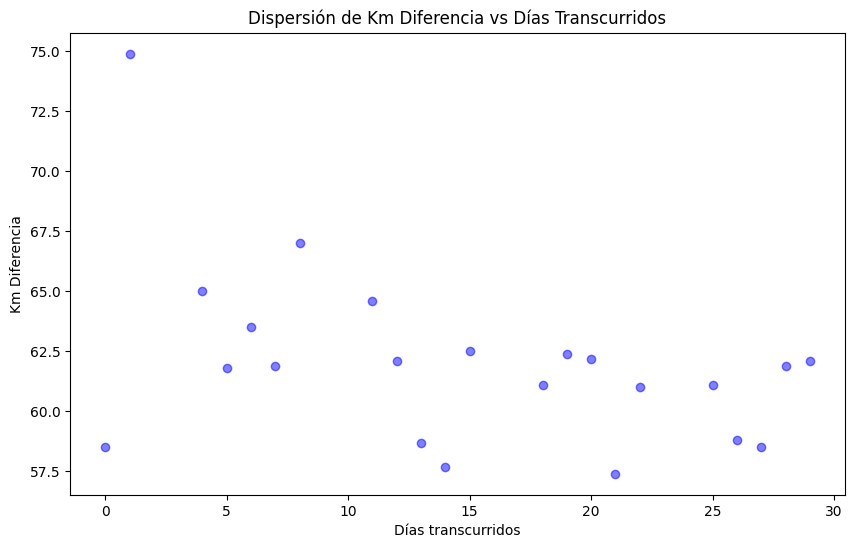

In [800]:
# Convertir las columnas 'día', 'mes' y 'año' en una columna de fecha completa
feina_PM['fecha'] = pd.to_datetime(feina_PM[['year', 'month', 'day']])

# Definir la fecha inicial desde la cual calcular los días transcurridos
fecha_inicial = pd.Timestamp(feina_PM["fecha"].iloc[0])  # Cambia esto a la fecha inicial deseada

# Calcular la diferencia en días entre cada fecha y la fecha inicial
feina_PM['días_transcurridos'] = (feina_PM['fecha'] - fecha_inicial).dt.days

# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(feina_PM['días_transcurridos'], feina_PM['Km diferencia'], color='b', alpha=0.5)
plt.xlabel('Días transcurridos')
plt.ylabel('Km Diferencia')
plt.title('Dispersión de Km Diferencia vs Días Transcurridos')
plt.show()

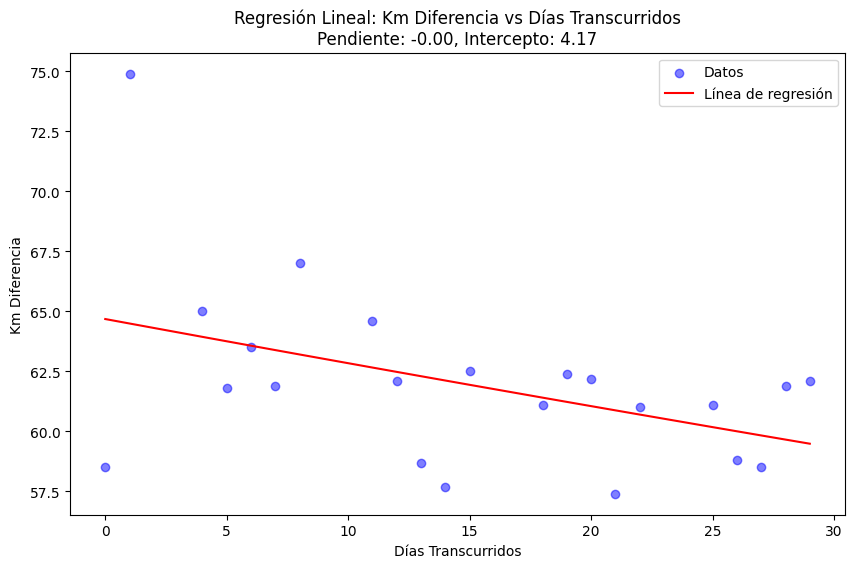

In [817]:
from sklearn.linear_model import LinearRegression

# Preparar los datos
X = feina_PM[['días_transcurridos']]
y = np.log(feina_PM['Km diferencia'])

# Crear y ajustar el modelo
modelo_km = LinearRegression()
modelo_km.fit(X, y)

# Predecir valores
feina_PM['prediccion'] = np.exp(modelo_km.predict(X))

# Coeficientes del modelo
pendiente_km = modelo_km.coef_[0]
intercepto_km = modelo_km.intercept_

# Gráfico de dispersión y línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(feina_PM['días_transcurridos'], feina_PM['Km diferencia'], color='b', alpha=0.5, label="Datos")
plt.plot(feina_PM['días_transcurridos'], feina_PM['prediccion'], color='r', label="Línea de regresión")

# Etiquetas y título
plt.xlabel('Días Transcurridos')
plt.ylabel('Km Diferencia')
plt.title(f'Regresión Lineal: Km Diferencia vs Días Transcurridos\nPendiente: {pendiente_km:.2f}, Intercepto: {intercepto_km:.2f}')
plt.legend()
plt.show()

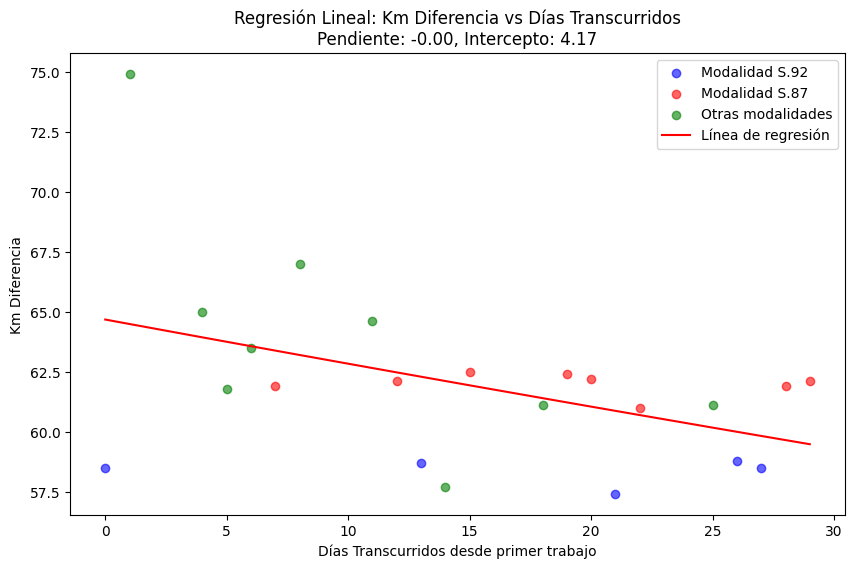

In [818]:
from sklearn.linear_model import LinearRegression

# Preparar los datos
X = feina_PM[['días_transcurridos']]
y = np.log(feina_PM['Km diferencia'])

# Crear y ajustar el modelo
modelo_km = LinearRegression()
modelo_km.fit(X, y)

# Predecir valores
feina_PM['prediccion'] = np.exp(modelo_km.predict(X))

# Coeficientes del modelo
pendiente_km = modelo_km.coef_[0]
intercepto_km = modelo_km.intercept_

# Filtrar los datos por "Modalitat trajecte"
feina_S92 = feina_PM[feina_PM['Modalitat trajecte'] == 'S.92']
feina_S87 = feina_PM[feina_PM['Modalitat trajecte'] == 'S.87']
feina_others = feina_PM[(feina_PM['Modalitat trajecte'] != 'S.92') & (feina_PM['Modalitat trajecte'] != 'S.87')]

# Gráfico de dispersión y línea de regresión
plt.figure(figsize=(10, 6))

# Puntos para 'S.92'
plt.scatter(feina_S92['días_transcurridos'], feina_S92['Km diferencia'], color='b', alpha=0.6, label="Modalidad S.92")
# Puntos para 'S.87'
plt.scatter(feina_S87['días_transcurridos'], feina_S87['Km diferencia'], color='r', alpha=0.6, label="Modalidad S.87")
# Puntos para otros trayectos
plt.scatter(feina_others['días_transcurridos'], feina_others['Km diferencia'], color='g', alpha=0.6, label="Otras modalidades")
# Regressión
plt.plot(feina_PM['días_transcurridos'], feina_PM['prediccion'], color='r', label="Línea de regresión")

# Etiquetas y título
plt.xlabel('Días Transcurridos desde primer trabajo')
plt.ylabel('Km Diferencia')
plt.title(f'Regresión Lineal: Km Diferencia vs Días Transcurridos\nPendiente: {pendiente_km:.2f}, Intercepto: {intercepto_km:.2f}')
plt.legend()
plt.show()

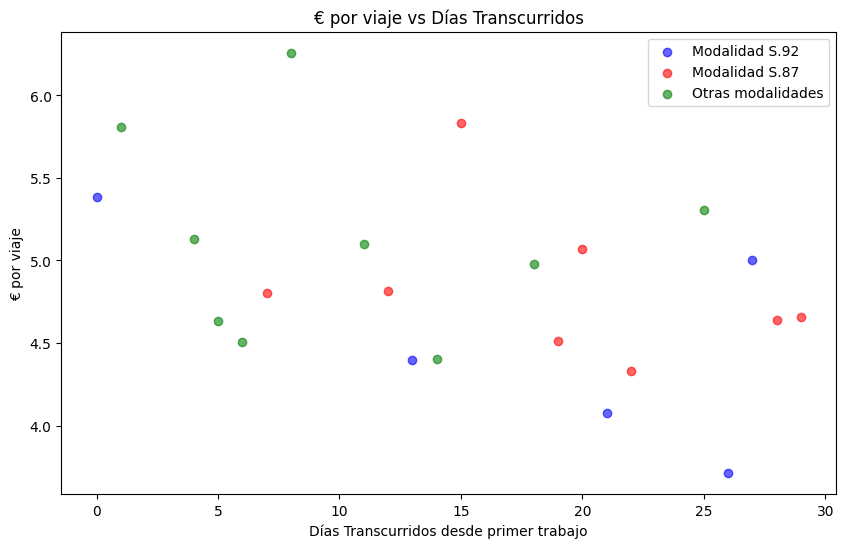

In [810]:

# Gráfico de dispersión y línea de regresión
plt.figure(figsize=(10, 6))

# Puntos para 'S.92'
plt.scatter(feina_S92['días_transcurridos'], feina_S92['Km diferencia']*1.315*feina_S92['L/100 km']/100, color='b', alpha=0.6, label="Modalidad S.92")
# Puntos para 'S.87'
plt.scatter(feina_S87['días_transcurridos'], feina_S87['Km diferencia']*1.315*feina_S87['L/100 km']/100, color='r', alpha=0.6, label="Modalidad S.87")
# Puntos para otros trayectos
plt.scatter(feina_others['días_transcurridos'], feina_others['Km diferencia']*1.315*feina_others['L/100 km']/100, color='g', alpha=0.6, label="Otras modalidades")

# Etiquetas y título
plt.xlabel('Días Transcurridos desde primer trabajo')
plt.ylabel('€ por viaje')
plt.title(f'€ por viaje vs Días Transcurridos')
plt.legend()
plt.show()

In [811]:
coche = pd.read_csv(ruta_principal + 'Despeses - Combov2.csv')
# Asignar los valores de la tercera fila (índice 2) como nombres de columna
coche.columns = coche.iloc[2]

# Eliminar las tres primeras filas y la que se usó para los nombres de columna
coche = coche.drop(index=[0, 1, 2])

# Reiniciar el índice para que comience desde 0 después de eliminar filas
coche = coche.reset_index(drop=True)

precio_gasolina = coche[["€/L", "Dia", "Mes", "Any"]].dropna()

In [812]:
precio_gasolina = precio_gasolina.rename(columns={'Any': 'year', 'Mes': 'month', 'Dia': 'day'})

# Convertir las columnas 'día', 'mes' y 'año' en una columna de fecha completa
precio_gasolina['fecha'] = pd.to_datetime(precio_gasolina[['year', 'month', 'day']])

# Definir la fecha inicial desde la cual calcular los días transcurridos
fecha_inicial = pd.Timestamp(feina_PM["fecha"].iloc[0])  # Cambia esto a la fecha inicial deseada

# Calcular la diferencia en días entre cada fecha y la fecha inicial
precio_gasolina['días_transcurridos'] = (precio_gasolina['fecha'] - fecha_inicial).dt.days

precio_gasolina.head()

2,€/L,day,month,year,fecha,días_transcurridos
5,"1,399",8,12,2022,2022-12-08,-651
9,"1,589",8,1,2023,2023-01-08,-620
19,"1,599",23,1,2023,2023-01-23,-605
24,"1,589",28,1,2023,2023-01-28,-600
42,"1,519",13,2,2023,2023-02-13,-584


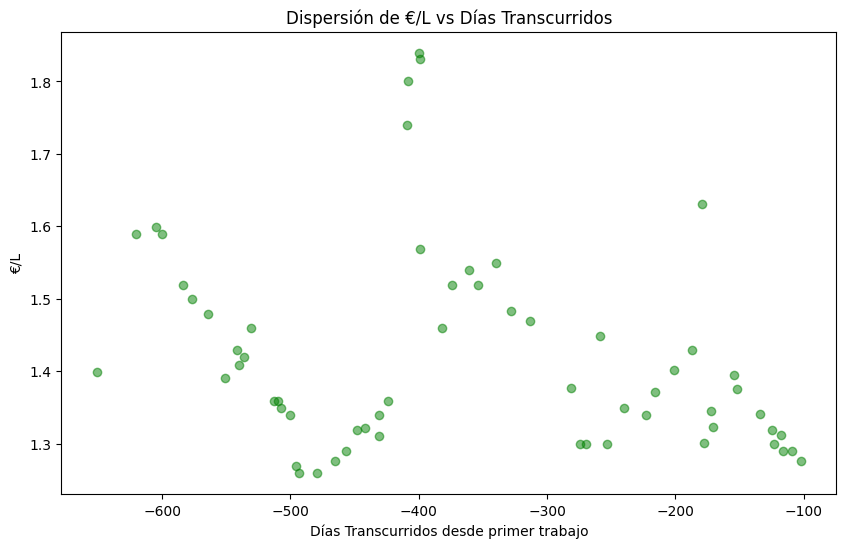

In [813]:
# Convertir string a float
precio_gasolina['€/L'] = precio_gasolina['€/L'].apply(lambda x: float(x.replace(',', '.')))

# Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(precio_gasolina['días_transcurridos'], precio_gasolina['€/L'], color='g', alpha=0.5)
plt.xlabel('Días Transcurridos desde primer trabajo')
plt.ylabel('€/L')
plt.title('Dispersión de €/L vs Días Transcurridos')
plt.show()

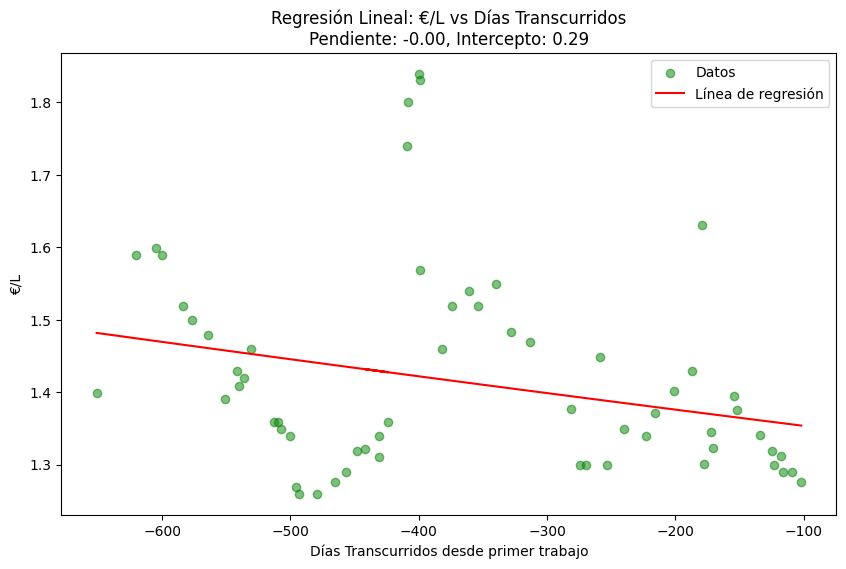

In [814]:
from sklearn.linear_model import LinearRegression

# Preparar los datos
X = precio_gasolina[['días_transcurridos']]
y = np.log(precio_gasolina['€/L'])

# Crear y ajustar el modelo
modelo_euro = LinearRegression()
modelo_euro.fit(X, y)

# Predecir valores
precio_gasolina['prediccion'] = np.exp(modelo_euro.predict(X))

# Coeficientes del modelo
pendiente_euro = modelo_euro.coef_[0]
intercepto_euro = modelo_euro.intercept_

# Gráfico de dispersión y línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(precio_gasolina['días_transcurridos'], precio_gasolina['€/L'], color='g', alpha=0.5, label="Datos")
plt.plot(precio_gasolina['días_transcurridos'], precio_gasolina['prediccion'], color='r', label="Línea de regresión")

# Etiquetas y título
plt.xlabel('Días Transcurridos desde primer trabajo')
plt.ylabel('€/L')
plt.title(f'Regresión Lineal: €/L vs Días Transcurridos\nPendiente: {pendiente_euro:.2f}, Intercepto: {intercepto_euro:.2f}')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


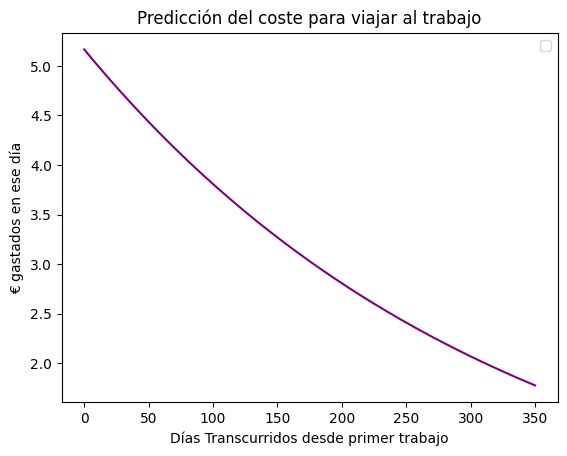

In [819]:
def precio_trabajo(x):
  return np.exp(modelo_km.predict(x)+modelo_euro.predict(x))*6/100

x_rango = np.arange(0, 351).reshape(-1, 1)
y_predict = precio_trabajo(x_rango)

plt.plot(x_rango, y_predict, color='purple')
plt.xlabel('Días Transcurridos desde primer trabajo')
plt.ylabel('€ gastados en ese día')
plt.title("Predicción del coste para viajar al trabajo")
plt.legend()
plt.show()